In [1]:
import pandas as pd

In [2]:
folder = '/media/username/DATA_LINUX1/Datasets/Odeuropa/benchmarks_and_corpora/benchmarks/EN/webanno'

In [3]:
model_architecture = "emanjavacas/MacBERTh"

#model_architecture = "bert-base-uncased"
#model_architecture = "roberta-base"

In [4]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


/home/cboscher/anaconda3/envs/tweet_extraction37/lib/python3.7/site-packages/requests/__init__.py:114: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (None)/charset_normalizer (3.1.0) doesn't match a supported version!
  RequestsDependencyWarning,


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-10-07 18:58:24.015598: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-07 18:58:24.104780: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-07 18:58:24.104886: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [5]:
# import required module
import os
 
 
# iterate over files in
# that directory
count=0

print(os.walk(folder))

dataframes = []
for subfolder in sorted(os.listdir(folder)):
        subfolder_path = subfolder
        tables = []
        subfolder_path = os.path.join(folder, subfolder_path)
        for file in os.scandir(subfolder_path):
            if file.is_file():
                annotation_path = os.path.join(subfolder_path, file)

                table = pd.read_table(annotation_path,comment='#', error_bad_lines=False, engine="python", header=None)
                table = table.rename(columns={0: "token_id", 1: "char_range", 2: "token", 3: "ref_type"})
                
                if not 'ref_type' in table:
                    continue
                #table = table[~(table['ref_type'] == '_') & ~table['ref_type'].isna()]
                table['filename'] = annotation_path.split('/')[-2]
                tables.append(table)
                print(annotation_path)
                
        dataframes.append(pd.concat(tables, ignore_index=True, axis=0))


/home/cboscher/anaconda3/envs/tweet_extraction37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 966: '	' expected after '"'
Skipping line 997: '	' expected after '"'
Skipping line 3464: '	' expected after '"'
Skipping line 3503: '	' expected after '"'
Skipping line 3573: unexpected end of data


<generator object walk at 0x7f3312d45250>
/media/cboscher/DATA_LINUX1/Datasets/Odeuropa/benchmarks_and_corpora/benchmarks/EN/webanno/001E Donald Mcdonald 1895 Sweet scented flowers and fragrant leaves__2137_distribution_MED.txt/001E Donald Mcdonald 1895 Sweet scented flowers and fragrant leaves__2137_distribution_MED.tsv
/media/cboscher/DATA_LINUX1/Datasets/Odeuropa/benchmarks_and_corpora/benchmarks/EN/webanno/001E Donald Mcdonald 1895 Sweet scented flowers and fragrant leaves__2137_distribution_MED.txt/admin.tsv
/media/cboscher/DATA_LINUX1/Datasets/Odeuropa/benchmarks_and_corpora/benchmarks/EN/webanno/001E Donald Mcdonald 1895 Sweet scented flowers and fragrant leaves__2137_distribution_MED.txt/teresa.tsv
/media/cboscher/DATA_LINUX1/Datasets/Odeuropa/benchmarks_and_corpora/benchmarks/EN/webanno/001E Donald Mcdonald 1895 Sweet scented flowers and fragrant leaves__2137_distribution_MED.txt/satonelli.tsv
/media/cboscher/DATA_LINUX1/Datasets/Odeuropa/benchmarks_and_corpora/benchmarks/EN/w

/media/cboscher/DATA_LINUX1/Datasets/Odeuropa/benchmarks_and_corpora/benchmarks/EN/webanno/040E City of London 1921 board of health report Wellcome Londons Pulse database__12_PUB.txt/teresa.tsv
/media/cboscher/DATA_LINUX1/Datasets/Odeuropa/benchmarks_and_corpora/benchmarks/EN/webanno/040E City of London 1921 board of health report Wellcome Londons Pulse database__12_PUB.txt/satonelli.tsv
/media/cboscher/DATA_LINUX1/Datasets/Odeuropa/benchmarks_and_corpora/benchmarks/EN/webanno/041E Charles Turner Thackrah 1831 The effects of the principal arts__109_PUB.txt/teresa.tsv


Skipping line 1535: '	' expected after '"'
Skipping line 1658: unexpected end of data
Skipping line 1487: '	' expected after '"'
Skipping line 1492: '	' expected after '"'
Skipping line 1512: '	' expected after '"'
Skipping line 1517: unexpected end of data
Skipping line 632: '	' expected after '"'
Skipping line 685: '	' expected after '"'
Skipping line 709: '	' expected after '"'
Skipping line 795: '	' expected after '"'
Skipping line 926: '	' expected after '"'
Skipping line 927: '	' expected after '"'
Skipping line 956: '	' expected after '"'
Skipping line 963: '	' expected after '"'
Skipping line 1188: unexpected end of data
Skipping line 634: '	' expected after '"'
Skipping line 687: '	' expected after '"'
Skipping line 711: '	' expected after '"'
Skipping line 797: '	' expected after '"'
Skipping line 928: '	' expected after '"'
Skipping line 929: '	' expected after '"'
Skipping line 958: '	' expected after '"'
Skipping line 965: '	' expected after '"'
Skipping line 1190: unexpec

/media/cboscher/DATA_LINUX1/Datasets/Odeuropa/benchmarks_and_corpora/benchmarks/EN/webanno/041E Charles Turner Thackrah 1831 The effects of the principal arts__109_PUB.txt/satonelli.tsv
/media/cboscher/DATA_LINUX1/Datasets/Odeuropa/benchmarks_and_corpora/benchmarks/EN/webanno/042E Hoffman and Ramazzini 1744 Endemical diseases and diseases of tradesmen__163_distribution_PUB.txt/teresa.tsv
/media/cboscher/DATA_LINUX1/Datasets/Odeuropa/benchmarks_and_corpora/benchmarks/EN/webanno/042E Hoffman and Ramazzini 1744 Endemical diseases and diseases of tradesmen__163_distribution_PUB.txt/satonelli.tsv
/media/cboscher/DATA_LINUX1/Datasets/Odeuropa/benchmarks_and_corpora/benchmarks/EN/webanno/043E Thomas Lodge 1603 A Treatise of the plague_35_PUB.txt/teresa.tsv
/media/cboscher/DATA_LINUX1/Datasets/Odeuropa/benchmarks_and_corpora/benchmarks/EN/webanno/043E Thomas Lodge 1603 A Treatise of the plague_35_PUB.txt/satonelli.tsv
/media/cboscher/DATA_LINUX1/Datasets/Odeuropa/benchmarks_and_corpora/benchma

/media/cboscher/DATA_LINUX1/Datasets/Odeuropa/benchmarks_and_corpora/benchmarks/EN/webanno/075E The Case for Incense 1899__38_distribution_REL.txt/teresa.tsv
/media/cboscher/DATA_LINUX1/Datasets/Odeuropa/benchmarks_and_corpora/benchmarks/EN/webanno/076E Henry Dodwell 1711 Incense 2__41_distribution_REL.txt/teresa.tsv
/media/cboscher/DATA_LINUX1/Datasets/Odeuropa/benchmarks_and_corpora/benchmarks/EN/webanno/077E Richard Braithwaite 1620 Essays upon the five senses_45_REL.txt/teresa.tsv
/media/cboscher/DATA_LINUX1/Datasets/Odeuropa/benchmarks_and_corpora/benchmarks/EN/webanno/078E E. T. 1734 The Art and Mystery of vintners and wine coopers__64_distribution_HOUS.txt/teresa.tsv
/media/cboscher/DATA_LINUX1/Datasets/Odeuropa/benchmarks_and_corpora/benchmarks/EN/webanno/078E E. T. 1734 The Art and Mystery of vintners and wine coopers__64_distribution_HOUS.txt/satonelli.tsv
/media/cboscher/DATA_LINUX1/Datasets/Odeuropa/benchmarks_and_corpora/benchmarks/EN/webanno/079E William Black 1835 A prac

Skipping line 227: unexpected end of data
Skipping line 271: unexpected end of data
Skipping line 295: unexpected end of data


In [6]:
docs_folder = '/media/username/DATA_LINUX1/Datasets/Odeuropa/benchmarks_and_corpora/benchmarks/EN/source/source'

In [7]:
from nltk import tokenize

text_content = {}
for file in sorted(os.listdir(docs_folder)):
    with open(os.path.join(docs_folder, file)) as f:
        lines = f.read()

        lines = tokenize.sent_tokenize(lines)
        lines =[line.replace('\n', ' ') for line in lines]
        lines =[line.replace('\t', ' ') for line in lines]
        text_content[file] = lines

In [8]:
text_content.keys()

dict_keys(['001E Donald Mcdonald 1895 Sweet scented flowers and fragrant leaves__2137_distribution_MED.txt', '002E Charles Dickens 1846 Pictures from Italy__52_TRAV.txt', '003E Stephen Bradwell 1636 PHYSICK FOR THE SICKNESSE Commonly called the PLAGUE.txt_distribution.txt', '004E Samuel Purchase  1657 A THEATRE OF Politicall Flying Insects.TXT__84_SCIE.txt', '005E Daniel Featley 1636 Clavis Mystica 70 sermons__159_REL.txt', '006E W Murdoch 1858 Report of the Medical Officer of Health for Rotherhithe 1857  Wellcome Londons Pulse database_PUB.txt', '007E Dan McKenzie 1923 Aromatics and the soul__748_MED.txt', '008E Anon 1779 A short history of drugs.txt_distribution.txt', '009E Erasmus Darwin 1794 Zoonomia or the laws of organic life London 1794 ECCO TCP_MED.txt', '010E Jonathan Swift 1727 Gullivers travels London 1727 Proj Gutenberg__54_LIT.txt', '011E James Manning 1604 A NEW BOOKE intituled I am for you all Complexions__28_MED.txt', '012E Pieter van Foreest 1623 The Arraignment of Uri

In [9]:
text_content

{'001E Donald Mcdonald 1895 Sweet scented flowers and fragrant leaves__2137_distribution_MED.txt': ['enormous tropical forests, little known to man, and from which he gathers here and there the treasures for our orchid- and greenhouses ; great island conservatories like Java and Ceylon and Borneo, rich in spices and lovely plant life : Australian Bush, with traces of plant life as if from  another world, but often most delicate in odour even in the fragments of them we see in our greenhouses.',
  'It is not only from the fragile flower-vases these sweet odours flow; they breathe through leaf and stem, and the whole being of many trees and bushes, from the stately Cum trees of Australia to the sweet Verbena of Chili.',
  'Many must have felt the charm of the strange scent of the Boxbush before Oliver Wendell Holmes told us of its ‘ breathing the fragrance of eternity, for this is one of the odours which carry us out of time into the abysses of the unbeginning past.’ The scent of flowers

In [10]:
refs = pd.concat(dataframes)

In [11]:
refs['ref_type'] = refs['ref_type'].apply(lambda x: str(x).split('[')[0] if x!= "_" else "_")
refs['sentence_id'] = refs['token_id'].apply(lambda x : x.split('-')[0])
refs = refs.drop_duplicates(subset=['filename', 'sentence_id', 'token_id'])

In [12]:
refs['ref_type'].value_counts()

_                  64024
nan                38562
Smell\_Source       1639
Circumstances       1031
Effect               834
Smell\_Word          764
Quality              614
Location             348
Perceiver            339
Time                 206
Evoked\_Odorant      196
Odour\_Carrier       148
*                     10
None                   3
Name: ref_type, dtype: int64

In [13]:
refs[refs['ref_type'] == 'Smell\_Word']['token'].unique()

array(['odours', 'leaf', 'being', 'stately', 'Chili', 'scents', 'putrid',
       'perfume', 'fragrant', 'smells', 'aromaticall', 'odorem', 'savour',
       'smell', 'stench', 'effluvium', 'that', 'impregnated',
       'pestilential', 'smelt', 'odour', 'putrifies', 'stenches',
       'nuisance', 'effluvia', 'fetid', 'olfactory', 'stenchless',
       'fragrance', 'Stenches', 'evil-smelling', 'anosmic', 'perfumes',
       'whiff', 'smelled', 'Stinking', 'atmospheres', 'obnoxious',
       'noxious', 'emanations', 'foul', 'Smell', 'Perfume', 'aromatic',
       'odoriferous', 'odorous', 'those', 'smelling', 'they', 'scent',
       'stinches', 'putrefaction', 'smell.Wherefore', 'stinking',
       'stinke', 'smels', 'sents', 'Aromatick', 'Smells', 'Odoriferous',
       'Aromaticks', 'Odors', 'Fragrant', 'Odor', 'Fetidness', 'Pungent',
       'Nauseous-Bitter', 'Nauseous', 'flatuous', 'offending', 'Fetor',
       'Fetors', 'Fetid', 'Elder-Smells', 'stink', 'more', 'grateful',
       'Fetids', '

In [14]:
#frame_elements = refs.groupby(['filename', 'ref_type'], as_index = False).agg({'token': ' '.join})
frame_elements = refs.groupby(['filename', 'sentence_id', 'ref_type'], as_index = False).agg({'token': ' '.join})
sentences = refs.groupby(['filename', 'sentence_id' ], as_index = False).agg({'token': ' '.join}).rename(columns ={'token': 'sentence'})

In [15]:
sentences['sentence'][0]

'enormous tropical forests , little known to man , and from which he gathers here and there the treasures for our orchid - and greenhouses ; great island conservatories like Java and Ceylon and Borneo , rich in spices and lovely plant life : Australian Bush , with traces of plant life as if from another world , but often most delicate in odour even in the fragments of them we see in our greenhouses .'

In [16]:
frame_elements = frame_elements[(frame_elements['ref_type']!='nan') & (frame_elements['ref_type']!='_') & (frame_elements['ref_type']!='*') & (frame_elements['ref_type']!='None')]
frame_elements = frame_elements[frame_elements['ref_type'].isin(['Smell\\_Source', 'Smell\\_Word', 'Quality', 'Odour\\_Carrier', 'Evoked\_Odorant'])]
# frame_elements = frame_elements[~frame_elements['ref_type'].isin(['Perceiver', 'Smell\\_Word'])]

In [17]:
frames = pd.merge(frame_elements, sentences, on=['filename', 'sentence_id']) 

In [18]:
types = frames['ref_type'].unique()

In [19]:
frame_elements

,filename,sentence_id,ref_type,token
0,001E Donald Mcdonald 1895 Sweet scented flower...,1,Evoked\_Odorant,Java
2,001E Donald Mcdonald 1895 Sweet scented flower...,1,Quality,Ceylon
15,001E Donald Mcdonald 1895 Sweet scented flower...,2,Quality,fragile
16,001E Donald Mcdonald 1895 Sweet scented flower...,2,Smell\_Source,bushes
17,001E Donald Mcdonald 1895 Sweet scented flower...,2,Smell\_Word,odours leaf being stately Chili
...,...,...,...,...
5233,085E Gervase Markham 1631 A new orchard__20_di...,5,Smell\_Source,they
5234,085E Gervase Markham 1631 A new orchard__20_di...,5,Smell\_Word,smell
5238,085E Gervase Markham 1631 A new orchard__20_di...,7,Smell\_Source,Their
5239,085E Gervase Markham 1631 A new orchard__20_di...,7,Smell\_Word,smelling


In [20]:
frames = frames[(frames['ref_type']!='nan') & (frames['ref_type']!='_') & (frames['ref_type']!='*') & (frames['ref_type']!='None')]

In [21]:
frames['ref_type'].unique()


array(['Evoked\\_Odorant', 'Quality', 'Smell\\_Source', 'Smell\\_Word',
       'Odour\\_Carrier'], dtype=object)

In [22]:
frames['ref_type'].value_counts()

Smell\_Word        523
Smell\_Source      445
Quality            298
Odour\_Carrier      67
Evoked\_Odorant     43
Name: ref_type, dtype: int64

In [23]:
frames = frames.groupby(['filename', 'sentence_id', 'sentence', 'ref_type'], as_index = False).agg({'token': ' '.join})

In [24]:
frames = pd.merge(frames, frame_elements[['filename', 'sentence_id', 'ref_type']], on=['filename', 'sentence_id', 'ref_type'])

In [25]:
frames

,filename,sentence_id,sentence,ref_type,token
0,001E Donald Mcdonald 1895 Sweet scented flower...,1,"enormous tropical forests , little known to ma...",Evoked\_Odorant,Java
1,001E Donald Mcdonald 1895 Sweet scented flower...,1,"enormous tropical forests , little known to ma...",Quality,Ceylon
2,001E Donald Mcdonald 1895 Sweet scented flower...,2,It is not only from the fragile flower-vases t...,Quality,fragile
3,001E Donald Mcdonald 1895 Sweet scented flower...,2,It is not only from the fragile flower-vases t...,Smell\_Source,bushes
4,001E Donald Mcdonald 1895 Sweet scented flower...,2,It is not only from the fragile flower-vases t...,Smell\_Word,odours leaf being stately Chili
...,...,...,...,...,...
1371,085E Gervase Markham 1631 A new orchard__20_di...,5,"I haue of them nine or ten seuerall colours , ...",Smell\_Source,they
1372,085E Gervase Markham 1631 A new orchard__20_di...,5,"I haue of them nine or ten seuerall colours , ...",Smell\_Word,smell
1373,085E Gervase Markham 1631 A new orchard__20_di...,7,"Their vse is much in ornament , and conforting...",Smell\_Source,Their
1374,085E Gervase Markham 1631 A new orchard__20_di...,7,"Their vse is much in ornament , and conforting...",Smell\_Word,smelling


In [26]:
frames = frames.drop_duplicates(subset=['filename', 'sentence_id'], keep='first').reset_index()

In [27]:
def get_full_sentence(sequence, filename, dictionnary):
    for sentence in dictionnary[filename]:
        if sequence in sentence:
            return sentence
        
    return sequence

In [28]:
def contains_olfaction(sentence, fe_df):
    return True if sentence in fe_df['sentence'].tolist() else False

# sentences = []
# for key in text_content.keys():
#     sentences += [sentence for sentence in text_content[key]]
    
# sentences_df = pd.DataFrame(sentences, columns=['sentence'])
# sentences_df['contains_ref'] = sentences_df['sentence'].apply(lambda x: contains_olfaction(x, frame_elements))


In [29]:
frame_elements = frames
frame_elements['original_ref_type'] = frame_elements['ref_type']
frame_elements['ref_type'] = 'Olfactive'

In [30]:
frames

,index,filename,sentence_id,sentence,ref_type,token,original_ref_type
0,0,001E Donald Mcdonald 1895 Sweet scented flower...,1,"enormous tropical forests , little known to ma...",Olfactive,Java,Evoked\_Odorant
1,2,001E Donald Mcdonald 1895 Sweet scented flower...,2,It is not only from the fragile flower-vases t...,Olfactive,fragile,Quality
2,5,002E Charles Dickens 1846 Pictures from Italy_...,8,"I go back to it , in fancy , as I have done in...",Olfactive,sweet,Quality
3,7,003E Stephen Bradwell 1636 PHYSICK FOR THE SIC...,72,"Also , they whose Veynes and Vessels , are ful...",Olfactive,being,Smell\_Word
4,8,003E Stephen Bradwell 1636 PHYSICK FOR THE SIC...,86,So Hippocrates ( in the 2d . of his Epidem . )...,Olfactive,Vlcers Pustuls,Smell\_Source
...,...,...,...,...,...,...,...
597,1365,085E Gervase Markham 1631 A new orchard__20_di...,14,"This flower is good for Bees , most comfortabl...",Olfactive,most comfortable strong,Quality
598,1368,085E Gervase Markham 1631 A new orchard__20_di...,3,"Iuly-flowers , commonly called Gilly-flowers ,...",Olfactive,Iuly-flowers Gilly-flowers Cloue-Iuly-flowers ...,Smell\_Source
599,1370,085E Gervase Markham 1631 A new orchard__20_di...,5,"I haue of them nine or ten seuerall colours , ...",Olfactive,the most pleasant,Quality
600,1373,085E Gervase Markham 1631 A new orchard__20_di...,7,"Their vse is much in ornament , and conforting...",Olfactive,Their,Smell\_Source


In [31]:
frame_elements

,index,filename,sentence_id,sentence,ref_type,token,original_ref_type
0,0,001E Donald Mcdonald 1895 Sweet scented flower...,1,"enormous tropical forests , little known to ma...",Olfactive,Java,Evoked\_Odorant
1,2,001E Donald Mcdonald 1895 Sweet scented flower...,2,It is not only from the fragile flower-vases t...,Olfactive,fragile,Quality
2,5,002E Charles Dickens 1846 Pictures from Italy_...,8,"I go back to it , in fancy , as I have done in...",Olfactive,sweet,Quality
3,7,003E Stephen Bradwell 1636 PHYSICK FOR THE SIC...,72,"Also , they whose Veynes and Vessels , are ful...",Olfactive,being,Smell\_Word
4,8,003E Stephen Bradwell 1636 PHYSICK FOR THE SIC...,86,So Hippocrates ( in the 2d . of his Epidem . )...,Olfactive,Vlcers Pustuls,Smell\_Source
...,...,...,...,...,...,...,...
597,1365,085E Gervase Markham 1631 A new orchard__20_di...,14,"This flower is good for Bees , most comfortabl...",Olfactive,most comfortable strong,Quality
598,1368,085E Gervase Markham 1631 A new orchard__20_di...,3,"Iuly-flowers , commonly called Gilly-flowers ,...",Olfactive,Iuly-flowers Gilly-flowers Cloue-Iuly-flowers ...,Smell\_Source
599,1370,085E Gervase Markham 1631 A new orchard__20_di...,5,"I haue of them nine or ten seuerall colours , ...",Olfactive,the most pleasant,Quality
600,1373,085E Gervase Markham 1631 A new orchard__20_di...,7,"Their vse is much in ornament , and conforting...",Olfactive,Their,Smell\_Source


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from operator import itemgetter, attrgetter
from sklearn.feature_extraction.text import CountVectorizer
import os
from tensorflow.keras import backend as k
from tensorflow.keras import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
import matplotlib.pyplot as plt
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from string import punctuation
from gensim.models import KeyedVectors
from sklearn.model_selection import train_test_split
# from emoji import *
# import emoji
import functools
import string
import operator
import random
random.seed(50)
##basic imports
import numpy as np
import scipy
import pandas as pd
import random as rn
import tensorflow as tf
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
from keras import backend as K
import tensorflow as tf
import tensorflow.keras.backend as K
from sklearn.model_selection import StratifiedKFold
from transformers import *
import tokenizers
print('TF version',tf.__version__)
import evaluate

[nltk_data] Downloading package wordnet to /home/cboscher/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/cboscher/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/cboscher/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/home/cboscher/anaconda3/envs/tweet_extraction37/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/cboscher/anaconda3/envs/tweet_extraction37/lib/python3.7/site-packages/transformers/generation_utils.py:27: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  FutureWarni

TF version 2.7.0


In [33]:
!pip install evaluate

/bin/bash: /home/cboscher/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [34]:
frame_elements['len'] = frame_elements['sentence'].apply(lambda x: len(x.split()))
frame_elements = frame_elements[frame_elements['len'] <= 500]

In [35]:

train_data = frame_elements.sample(frac = 0.8, random_state=1).reset_index()
test_data = frame_elements.drop(train_data.index).reset_index()

In [36]:
test_data = test_data[test_data['ref_type']=='Olfactive'].reset_index(drop="true")
train_data = train_data[train_data['ref_type']=='Olfactive'].reset_index(drop="true")

In [37]:
test_data

,level_0,index,filename,sentence_id,sentence,ref_type,token,original_ref_type,len
0,481,1096,061E Hugh Plat 1602 Delightes for Ladies__22_d...,6,"To make a water smelling of the Eglantine , Gi...",Olfactive,water,Odour\_Carrier,14
1,482,1099,061E Hugh Plat 1602 Delightes for Ladies__22_d...,7,"DRie the hearbe or flower , and distill the sa...",Olfactive,in the water,Odour\_Carrier,51
2,483,1102,062E William Salmon 1672 Polygraphice__205_dis...,12,"The cheat is discerned , by its easie dissolvi...",Olfactive,different,Quality,19
3,484,1105,062E William Salmon 1672 Polygraphice__205_dis...,18,"To restore the lost scent to Musk , or Ambergr...",Olfactive,lost,Quality,11
4,485,1108,062E William Salmon 1672 Polygraphice__205_dis...,19,"This is done , by hanging it some time in a Ja...",Olfactive,ill,Quality,33
...,...,...,...,...,...,...,...,...,...
115,597,1365,085E Gervase Markham 1631 A new orchard__20_di...,14,"This flower is good for Bees , most comfortabl...",Olfactive,most comfortable strong,Quality,32
116,598,1368,085E Gervase Markham 1631 A new orchard__20_di...,3,"Iuly-flowers , commonly called Gilly-flowers ,...",Olfactive,Iuly-flowers Gilly-flowers Cloue-Iuly-flowers ...,Smell\_Source,31
117,599,1370,085E Gervase Markham 1631 A new orchard__20_di...,5,"I haue of them nine or ten seuerall colours , ...",Olfactive,the most pleasant,Quality,48
118,600,1373,085E Gervase Markham 1631 A new orchard__20_di...,7,"Their vse is much in ornament , and conforting...",Olfactive,Their,Smell\_Source,18


In [38]:
print("shape of the training data : ", train_data.shape)
print("Number of data points in the train data : " , train_data.shape[0])
print("Number of feature in the train data : " , train_data.shape[1])

shape of the training data :  (481, 9)
Number of data points in the train data :  481
Number of feature in the train data :  9


In [39]:
print("shape of the test data : ", test_data.shape)
print("Number of data points in the test data : " , test_data.shape[0])
print("Number of feature in the test data : " , test_data.shape[1])

shape of the test data :  (120, 9)
Number of data points in the test data :  120
Number of feature in the test data :  9


In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   level_0            481 non-null    int64 
 1   index              481 non-null    int64 
 2   filename           481 non-null    object
 3   sentence_id        481 non-null    object
 4   sentence           481 non-null    object
 5   ref_type           481 non-null    object
 6   token              481 non-null    object
 7   original_ref_type  481 non-null    object
 8   len                481 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 33.9+ KB


In [41]:
# refer : AAIC
def Distribution(data ,column_name, title):
    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(12,6))

    # we need the total number of data to find the percentage later.
    total = len(data) * 1

    # below code will simply plot bar plot where X axis is sentiment and y will simply count
    ax = sns.countplot(x=column_name, data=data)


    # each p of patches(which is from the countplot) has height(number of data point for a given class ),width.
    # then pass p to annotate(it is used to show text) and computing % of data in each class , give x coord and y coord of rectangle
    for p in ax.patches:
            ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))


    # In th yaxis we are giving interval(11 interval) of datapoints 
    ax.yaxis.set_ticks(np.linspace(0, total, 11))


    # adjust the ticklabel to the desired format, without changing the position of the ticks.
    # map() need the function(what to do) and iterative
    # below code : ax.yaxis.get_majorticklocs() - it will give 11 value from 0 to 27481 and we are dividing it with the total value which is 27481 after that we are getting 11 intervals with the percentile 
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))

    plt.title(title)
    plt.grid()
    plt.show() 

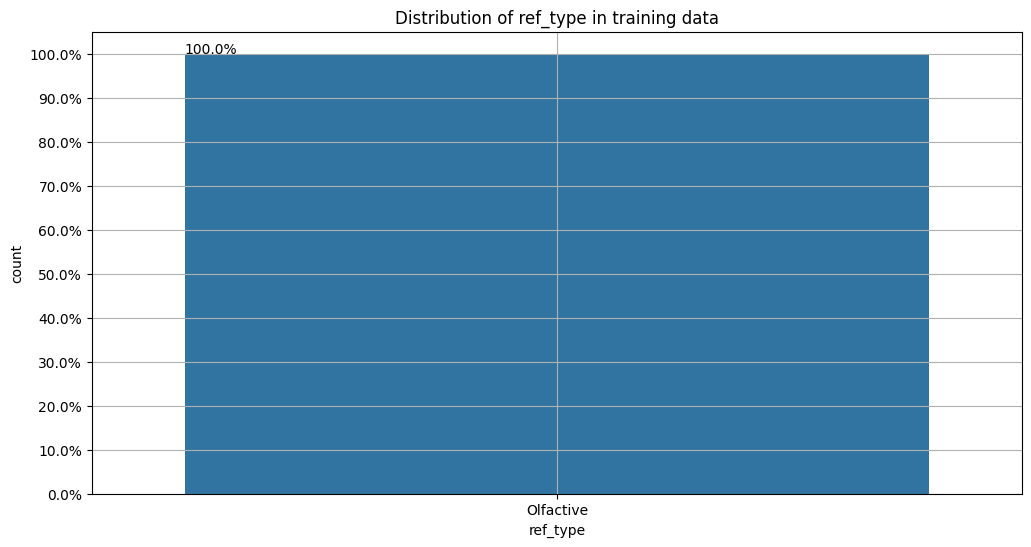

In [42]:
Distribution(train_data ,'ref_type',"Distribution of ref_type in training data" )

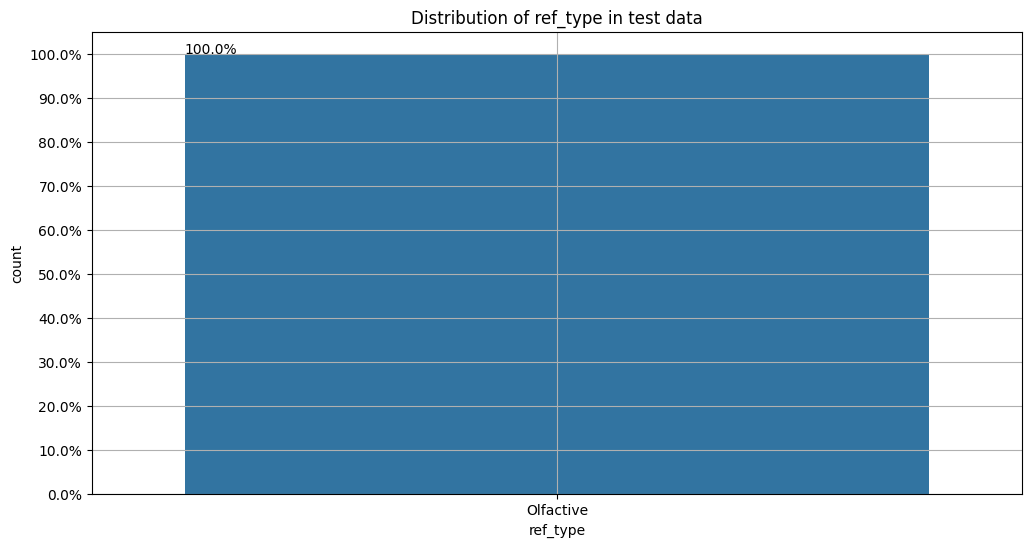

In [43]:
Distribution(test_data ,'ref_type',"Distribution of ref_type in test data" )

In [44]:
# check duplicate value
# drop_duplicates () : this function return DataFrame with duplicate rows removed.
#train_data = train_data.drop_duplicates(keep ='first' , inplace = False)
print(train_data.shape)
# check null value
null_rows = train_data[train_data.isnull().any(1)]
print(null_rows)
train_data.dropna(inplace=True)
null_rows = train_data[train_data.isnull().any(1)]
print(null_rows)

(481, 9)
Empty DataFrame
Columns: [level_0, index, filename, sentence_id, sentence, ref_type, token, original_ref_type, len]
Index: []
Empty DataFrame
Columns: [level_0, index, filename, sentence_id, sentence, ref_type, token, original_ref_type, len]
Index: []


In [45]:
# data cleaning
# There were some word which i think might useful in the analysis which are present in the stopword are removed (like dont, would not ,does not , not etc ..)
stopwords= set([ 'im','the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about','between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', 'didn', 'doesn', 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', 'wasn', "wasn't", 'weren', "weren't", \
            'won', 'wouldn'])

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
#     text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = ' '.join(e.lower() for e in text.split() if e.lower() not in stopwords)
    return text

In [46]:
# given each senetnce it will call the clean_text()
train_data['clean_sentence'] = train_data['sentence'].apply(lambda x:clean_text(x))
train_data['clean_token'] = train_data['token'].apply(lambda x:clean_text(x))



In [47]:
# given each senetnce it will call the clean_text()
test_data['clean_sentence'] = test_data['sentence'].apply(lambda x:clean_text(x))
test_data['clean_token'] = test_data['token'].apply(lambda x:clean_text(x))

In [48]:
train_data = train_data.reset_index(drop='true')
test_data = test_data.reset_index(drop='true')

In [49]:
train_data['ref_type'].value_counts()

Olfactive    481
Name: ref_type, dtype: int64

In [50]:
def word_len(text_data):
    # create a list to store the lenght of the sentence
    store = []
    # iterate thrrough each loop
    for i in text_data[:]:
        #split each word and count them and append in store
        store.append((len(str(i).split())))
    return store

In [51]:
train_data['Number_of_word_in_text'] = word_len(train_data['sentence'])
train_data["Number_of_word_in_select_text"] = word_len(train_data['token'])
train_data["difference_word_in_text_and_selected_text"] = train_data['Number_of_word_in_text'] - train_data["Number_of_word_in_select_text"]
train_data.head(4)

,level_0,index,filename,sentence_id,sentence,ref_type,token,original_ref_type,len,clean_sentence,clean_token,Number_of_word_in_text,Number_of_word_in_select_text,difference_word_in_text_and_selected_text
0,446,996,057E Charles Lillie 1822 The British Perfumer_...,10,"As for the other Russian , or rather Dutch mus...",Olfactive,a most disagreeable and predominant ammoniacal,Quality,35,russian rather dutch musk pots generally moist...,disagreeable predominant ammoniacal,35,6,29
1,404,904,020E A H Swinton 1880 Insect Variety__210_SCIE...,23,In the tailed Hair Streaks the sexual spot tha...,Olfactive,the disc of the front wings of the female secr...,Smell\_Source,52,tailed hair streaks sexual spot may seen disc ...,disc front wings female secretion,52,10,42
2,509,1160,065E Ernest J Parry 1925 Parry's Cyclopedia of...,5,"It is invariably based on coumarin , modified ...",Olfactive,other,Quality,31,invariably based coumarin modified lavender be...,,31,1,30
3,455,1017,058E John Charles Sawer 1894 Odorographia__133...,7,"The oil is lighter than water , has a peculiar...",Olfactive,peculiar sweet ethereaT,Quality,23,oil lighter water peculiar sweet ethereat odou...,peculiar sweet ethereat,23,3,20


/home/cboscher/anaconda3/envs/tweet_extraction37/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  This is separate from the ipykernel package so we can avoid doing imports until
/home/cboscher/anaconda3/envs/tweet_extraction37/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  after removing the cwd from sys.path.


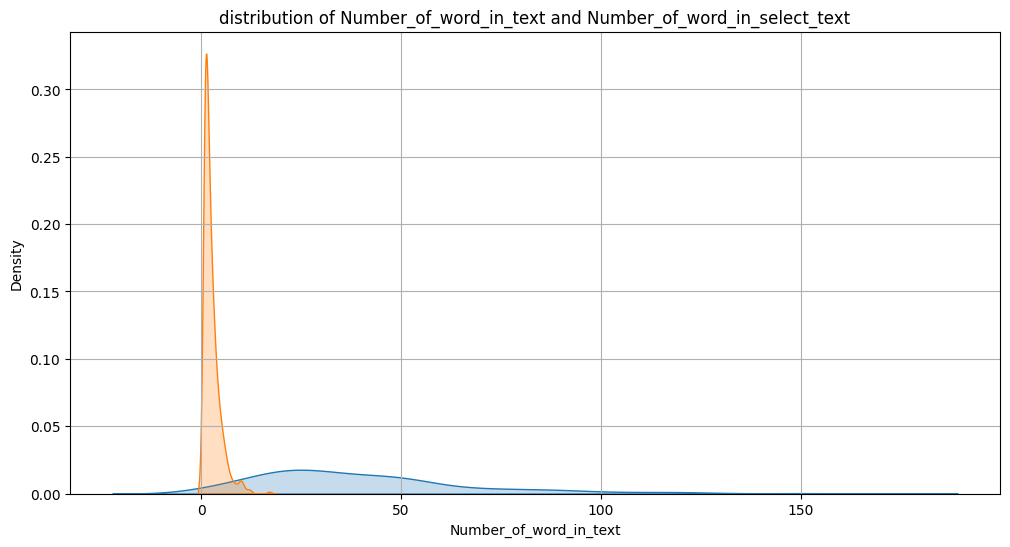

In [52]:
# lets check it out the distribution of Number_of_word_in_text and Number_of_word_in_select_text
f, ax = plt.subplots(figsize=(12,6))
ax = sns.kdeplot(train_data['Number_of_word_in_text'], shade= True)
ax = sns.kdeplot(train_data["Number_of_word_in_select_text"],shade= True )
plt.title("distribution of Number_of_word_in_text and Number_of_word_in_select_text")
plt.grid()
plt.show()

In [53]:
from collections import Counter
def common_word(data , num_word , color, column_name , sentiment):

    # create a temp list and store word 
    lst= []
    for i in data[data['ref_type']== sentiment][column_name][:]:
        lst.append(str(i).split())
    # create a object which store the Counter() : this function will count how many time a word occur in the corpus
    cnt = Counter()
    # iterate through each sentence
    for sentence in lst[:]:
        # iterate through each word
        for word in sentence:
            cnt[word] += 1
    # create a data frame and pass the most common words 
    fr = pd.DataFrame(cnt.most_common(num_word))
    # give name of the column
    fr.columns= ["frequent word" , "count"]
    # it will give the color 
    return fr.style.background_gradient(cmap= color) ,fr

In [54]:
frame_elements['ref_type'].unique()

array(['Olfactive'], dtype=object)

### Classifiy Attention Model

In [55]:
train_data

,level_0,index,filename,sentence_id,sentence,ref_type,token,original_ref_type,len,clean_sentence,clean_token,Number_of_word_in_text,Number_of_word_in_select_text,difference_word_in_text_and_selected_text
0,446,996,057E Charles Lillie 1822 The British Perfumer_...,10,"As for the other Russian , or rather Dutch mus...",Olfactive,a most disagreeable and predominant ammoniacal,Quality,35,russian rather dutch musk pots generally moist...,disagreeable predominant ammoniacal,35,6,29
1,404,904,020E A H Swinton 1880 Insect Variety__210_SCIE...,23,In the tailed Hair Streaks the sexual spot tha...,Olfactive,the disc of the front wings of the female secr...,Smell\_Source,52,tailed hair streaks sexual spot may seen disc ...,disc front wings female secretion,52,10,42
2,509,1160,065E Ernest J Parry 1925 Parry's Cyclopedia of...,5,"It is invariably based on coumarin , modified ...",Olfactive,other,Quality,31,invariably based coumarin modified lavender be...,,31,1,30
3,455,1017,058E John Charles Sawer 1894 Odorographia__133...,7,"The oil is lighter than water , has a peculiar...",Olfactive,peculiar sweet ethereaT,Quality,23,oil lighter water peculiar sweet ethereat odou...,peculiar sweet ethereat,23,3,20
4,201,446,014E John Floyer 1687 Pharmako Basnos__2427_ME...,3,"A middle state of Vegetable Oyl , is observabl...",Olfactive,Terebinthinate,Quality,67,middle state vegetable oyl observable turpenti...,terebinthinate,67,1,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,389,874,019E C E A Armand 1891 Pocket Pharmocopaeia__4...,90,The oil distilled in Britain from the full-gro...,Olfactive,the full-grown unripe green fruit of Juniperus...,Smell\_Source,15,oil distilled britain fullgrown unripe green f...,fullgrown unripe green fruit juniperus communis,15,8,7
477,552,1259,073E Samuel Lee 1673 Ecclesia Gemens__31_distr...,1,Let none stand amazed at the pageantry of fals...,Olfactive,the Whore of Rome,Smell\_Source,22,let none stand amazed pageantry false churches...,whore rome,22,4,18
478,54,126,007E Dan McKenzie 1923 Aromatics and the soul_...,1,Irishmen who do me the honour of tasting this ...,Olfactive,paradise,Smell\_Source,35,irishmen honour tasting light omelette scienti...,paradise,35,1,34
479,176,378,013E Edward Farnham 1656 The Compleat Doctores...,20,I answer ; sweet things applyed to the Matrix ...,Olfactive,stinking hot stinking,Quality,85,answer sweet things applyed matrix regard hot ...,stinking hot stinking,85,3,82


In [56]:
X_train , X_test , y_train , y_test = train_test_split(train_data , train_data.token , test_size = .1,random_state=42) 
X_train , X_val , y_train , y_val = train_test_split(X_train , X_train.token , test_size = .1,random_state=42)

In [57]:
def clean_text(text):
    """   remove @ , # , & , convert lower case , remove lower case"""
    # as we will work on rnns it is better not to remove the stopwords
    text = text.lower() # convert all text to lower case
    text = re.sub(r"(@[a-z]*)", "<mention>", text) #remove any word start with @
    text = re.sub(r"(&[a-z;]*)", "<none>", text) #remove any word start with &
    text = re.sub(r"(#[a-z;]*)", "<hash>", text) #remove any word start with #
    text = re.sub(r"(http|https|ftp|ftps)\:\/\/[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(\/\S*)?", "<link>", text)#remove LINKs
    text = re.sub(r'https?://\S+', '<link>', text) # remove https? links
    text = re.sub(r"(www.[a-z.\/0-9]*)", "<link>", text)#remove LINKs
    return text

def Transfrom_text(textT,textS,type):
    """ this function will repalce to <tok> which are in both text and selected text"""
    t = " ".join("<tok>" for i in range (len(textS.split()))) # take each sentence in selected text find the length and put <tok>
    textT = textT.replace(textS,t) # replace those word wich are in both text and selected_text with <tok>
    return textT # return those sentence

def preprocess_text(df):
    df['text_clean'] = df['clean_sentence'].apply(lambda x: clean_text(x)) # create clean text column
    df['selected_text_clean'] = df['clean_sentence'].apply(lambda x: clean_text(x)) # create clean selected text column
    df['target'] = pd.DataFrame([Transfrom_text(df['clean_sentence'][i],df['clean_token'][i],df['ref_type'][i]) for i in range(len(df))]) # apply the transform function to all 3 column
    return df

In [58]:
X_train['ref_type'].value_counts()

Olfactive    388
Name: ref_type, dtype: int64

In [59]:
# not considering the neutral tweet
#train_df = X_train[X_train.sentiment != 'neutral']
train_df = X_train
train_df = train_df.reset_index(drop='true')

#val_df = X_val[X_val.sentiment != 'neutral']
val_df = X_val
val_df = val_df.reset_index(drop='true')

#X_test = X_test[X_test.sentiment != 'neutral']
X_test = X_test
X_test = X_test.reset_index(drop='true')


X_train = preprocess_text(train_df)
X_test = preprocess_text(val_df)
X_val = preprocess_text(X_test)


print(X_train.shape)
print(X_train.shape, X_train.shape)
print(X_train.isnull().sum())

(388, 17)
(388, 17) (388, 17)
level_0                                      0
index                                        0
filename                                     0
sentence_id                                  0
sentence                                     0
ref_type                                     0
token                                        0
original_ref_type                            0
len                                          0
clean_sentence                               0
clean_token                                  0
Number_of_word_in_text                       0
Number_of_word_in_select_text                0
difference_word_in_text_and_selected_text    0
text_clean                                   0
selected_text_clean                          0
target                                       0
dtype: int64


In [60]:
train_df['ref_type'].value_counts()

Olfactive    388
Name: ref_type, dtype: int64

In [61]:
X_train.head(10)

,level_0,index,filename,sentence_id,sentence,ref_type,token,original_ref_type,len,clean_sentence,clean_token,Number_of_word_in_text,Number_of_word_in_select_text,difference_word_in_text_and_selected_text,text_clean,selected_text_clean,target
0,4,8,003E Stephen Bradwell 1636 PHYSICK FOR THE SIC...,86,So Hippocrates ( in the 2d . of his Epidem . )...,Olfactive,Vlcers Pustuls,Smell\_Source,42,hippocrates epidem saith cranon citie thessali...,vlcers pustuls,42,2,40,hippocrates epidem saith cranon citie thessali...,hippocrates epidem saith cranon citie thessali...,hippocrates epidem saith cranon citie thessali...
1,229,521,014E John Floyer 1687 Pharmako Basnos__2427_ME...,68,"The Fourth Class has a Bitterish Acrid Taste ,...",Olfactive,very heady,Quality,39,fourth class bitterish acrid taste cowslips al...,heady,39,2,37,fourth class bitterish acrid taste cowslips al...,fourth class bitterish acrid taste cowslips al...,fourth class bitterish acrid taste cowslips al...
2,373,850,019E C E A Armand 1891 Pocket Pharmocopaeia__4...,22,Oil of Cajupnt .,Olfactive,Oil of Cajupnt,Smell\_Source,4,oil cajupnt,oil cajupnt,4,3,1,oil cajupnt,oil cajupnt,<tok> <tok>
3,462,1036,059E Simon Barbe 1696 The French Perfumer__430...,14,"GET several sorts of Sieves , some of thin oth...",Olfactive,it,Odour\_Carrier,54,get several sorts sieves thin others thick clo...,,54,1,53,get several sorts sieves thin others thick clo...,get several sorts sieves thin others thick clo...,get several sorts sieves thin others thick clo...
4,255,585,016E Havelock Ellis 1905 Studies in the Psycho...,16,The perfume which is of all perfumes the most ...,Olfactive,the most interesting,Quality,20,perfume perfumes interesting present point vie...,interesting,20,3,17,perfume perfumes interesting present point vie...,perfume perfumes interesting present point vie...,perfume perfumes <tok> present point view cert...
5,265,616,016E Havelock Ellis 1905 Studies in the Psycho...,27,Galopin stated that he knew women whose natura...,Olfactive,natural sufficiently strong,Quality,56,galopin stated knew women whose natural odor m...,natural sufficiently strong,56,3,53,galopin stated knew women whose natural odor m...,galopin stated knew women whose natural odor m...,galopin stated knew women whose natural odor m...
6,443,990,056E Thomas Reid 1764 An inquiry into the huma...,23,Having found the smell thus constantly conjoin...,Olfactive,rose,Smell\_Source,44,found smell thus constantly conjoined rose min...,rose,44,1,43,found smell thus constantly conjoined rose min...,found smell thus constantly conjoined rose min...,found smell thus constantly conjoined <tok> mi...
7,45,104,006E W Murdoch 1858 Report of the Medical Offi...,57,I tasted the water from the butt at No . 21 ; ...,Olfactive,the water from the butt it,Odour\_Carrier,22,tasted water butt no strongly impregnated flav...,water butt,22,6,16,tasted water butt no strongly impregnated flav...,tasted water butt no strongly impregnated flav...,tasted <tok> <tok> no strongly impregnated fla...
8,211,472,014E John Floyer 1687 Pharmako Basnos__2427_ME...,45,Many Acrid Plants are Fetid ; so Sophia Chirur...,Olfactive,Fetid abominable,Quality,19,many acrid plants fetid sophia chirurgorum pou...,fetid abominable,19,2,17,many acrid plants fetid sophia chirurgorum pou...,many acrid plants fetid sophia chirurgorum pou...,many acrid plants fetid sophia chirurgorum pou...
9,233,532,014E John Floyer 1687 Pharmako Basnos__2427_ME...,8,A third degree of Balsamicks is in the Geraniu...,Olfactive,Geranium Moschatum Geranium Columbinum other G...,Odour\_Carrier,110,third degree balsamicks geranium moschatum ger...,geranium moschatum geranium columbinum geraniu...,110,10,100,third degree balsamicks geranium moschatum ger...,third degree balsamicks geranium moschatum ger...,third degree balsamicks geranium moschatum ger...


In [62]:
##  below code snippet is for tokenization 

# now merge all words 
#t1 = pd.DataFrame({'A': test.text.values})
t2 = pd.DataFrame({'A': X_train.text_clean})
t3 = pd.DataFrame({'A': X_train.target})
# print(t2)
all_tokens = pd.concat([t2,t3],axis = 0)

# create a tokenizer and fit all the words
token = Tokenizer(num_words=54000,filters='')
token.fit_on_texts(all_tokens.A) 
vocab_size = len(token.word_index)+1

MAX_LEN = 35
# give "<tok>" as 1
for word,i in token.word_index.items():
  if "<tok>" in word:
    token.word_index[word] = token.word_index["<tok>"]    
# it will create a vector based on the sentence word on train text data
train_seq_x = token.texts_to_sequences(X_train.text_clean)
# pre padding
train_pad_seq_x = pad_sequences(train_seq_x,maxlen=MAX_LEN)
# create vector on train target data

# it will create a vector based on the sentence word on train text data
val_seq_x = token.texts_to_sequences(X_val.text_clean)
# pre padding
val_pad_seq_x = pad_sequences(val_seq_x,maxlen=MAX_LEN )
# create vector on train target data

# it will create a vector based on the sentence word on test text data
test_seq_x = token.texts_to_sequences(X_test.text_clean)
# pre padding
test_pad_seq_x = pad_sequences(test_seq_x,maxlen=MAX_LEN)

# create vector on train target data
train_seq_y = token.texts_to_sequences(X_train.target)
# # pre padding
train_pad_seq_y = pad_sequences(train_seq_y,maxlen=MAX_LEN)

# create vector on  target data
val_seq_y = token.texts_to_sequences(X_val.target)
# # pre padding
val_pad_seq_y = pad_sequences(val_seq_y,maxlen=MAX_LEN)


# in the target data put 1 and 0 (if tok is present put 1 and all other values to 0)
train_pad_seq_y[train_pad_seq_y != token.word_index['<tok>']] = 0
train_pad_seq_y[train_pad_seq_y == token.word_index['<tok>']] = 1 

# in the target data put 1 and 0 (if tok is present put 1 and all other values to 0)
val_pad_seq_y[val_pad_seq_y != token.word_index['<tok>']] = 0
val_pad_seq_y[val_pad_seq_y == token.word_index['<tok>']] = 1

In [63]:
## using predefined glove vector
def embedding_matrix_glove():
  # to track the progress of computing
  tqdm.pandas()
  # create a viable to store glove vector
  f = open('glove.840B.300d.txt')
  # create a dictionary to 
  embedding_values = {}
  for line in tqdm(f):
    # take each word and the vector
    value = line.split(' ')
    # take the word
    word = value[0]
    # put all the numeric values to array
    coef = np.array(value[1:],dtype = 'float32')
    # take the word and array and put together
    embedding_values[word] = coef

  # take all the arrays from emmbeding values and stacked it
  all_embs = np.stack(embedding_values.values())
  # perform meand and standard deviation
  emb_mean,emb_std = all_embs.mean(), all_embs.std()
  #  create an embedding matrix of size (32515 ,300)
  embedding_matrix = np.random.normal(emb_mean, emb_std, (vocab_size, 300))

  lst = []
  # for each word and given count take the embedding values
  for word,i in tqdm(token.word_index.items()):
      # now take the word get a vector from embedding values(arrays)
      values = embedding_values.get(re.sub(r"[^A-Za-z]", "", word))
      if values is not None:
        embedding_matrix[i] = values
      else:
        lst.append(word) 

  return embedding_matrix 

In [64]:
def sensory_tag_token(token, sensoriality, dict_lexicon):
    if token in dict_lexicon:
        return dict_lexicon[token][sensoriality]
    else:
#         candidates = fasttext_model.get_nearest_neighbors(token, k=3)
        
#         for candidate in candidates:
#             lemma = candidate[1]
#             lemma = spacy_model(lemma)
#             lemma = lemma[0].lemma_
#             if lemma in dict_lexicon:
#                 return dict_lexicon[lemma][sensoriality]
        
        return 0

In [65]:
import spacy
from tqdm import tqdm
spacy_model = spacy.load("en_core_web_md")


In [66]:
lexicon_model = pd.read_csv('/media/username/DATA_LINUX1/Datasets/Lancaster/Lancaster_sensorimotor_norms_for_39707_words.csv')
lexicon = lexicon_model[['Word', 'Auditory.mean', 'Gustatory.mean', 'Haptic.mean', 'Interoceptive.mean', 'Olfactory.mean', 'Visual.mean', 'Foot_leg.mean', 'Hand_arm.mean', 'Head.mean', 'Mouth.mean', 'Torso.mean']]
lexicon = lexicon.rename(columns={"Auditory.mean": "Auditory", "Gustatory.mean": "Gustatory", "Haptic.mean": "Haptic", "Interoceptive.mean": "Interoceptive", "Olfactory.mean": "Olfactory", "Visual.mean": "Visual", 'Torso.mean': 'Torso', 'Mouth.mean': 'Mouth', 'Head.mean': 'Head', 'Foot_leg.mean': 'Foot_leg', 'Hand_arm.mean': 'Hand_arm'})

lexicon['Word'] = lexicon['Word'].apply(lambda x: x.lower())
lexicon = lexicon.set_index(['Word'])
dict_lexicon = lexicon.to_dict('index')

In [67]:
sensorialities = ['Auditory', 'Gustatory', 'Haptic', 'Interoceptive','Olfactory', 'Visual', 'Hand_arm', 'Foot_leg', 'Torso', 'Head', 'Mouth']

## using predefined glove vector
def embedding_matrix_glove_sensorimotor():
  # to track the progress of computing
  tqdm.pandas()
  # create a viable to store glove vector
  f = open('glove.840B.300d.txt')
  # create a dictionary to 
  embedding_values = {}
  for line in tqdm(f):
    # take each word and the vector
    value = line.split(' ')
    # take the word
    word = value[0]
    nlp = spacy_model(word)

    coef = []
    for sensoriality in sensorialities:
        coef.append(sensory_tag_token(nlp[0].lemma_, sensoriality, dict_lexicon))
        
    # take the word and array and put together
    embedding_values[word] = coef


  # take all the arrays from emmbeding values and stacked it
  all_embs = np.stack(embedding_values.values())
  # perform meand and standard deviation
  emb_mean,emb_std = all_embs.mean(), all_embs.std()
  #  create an embedding matrix of size (32515 ,300)
  embedding_matrix = np.random.normal(emb_mean, emb_std, (vocab_size, 11))

  lst = []
  # for each word and given count take the embedding values
  for word,i in tqdm(token.word_index.items()):
      # now take the word get a vector from embedding values(arrays)
      values = embedding_values.get(re.sub(r"[^A-Za-z]", "", word))
      if values is not None:
        embedding_matrix[i] = values
      else:
        lst.append(word) 

  return embedding_matrix 

In [68]:
# import time
# start = time.time()
# gv  = embedding_matrix_glove_sensorimotor()
# end = time.time()

# print(end - start)
gv = np.fromfile('embedding_matrix_glove.txt').reshape(3714, 11)

In [69]:
# This function is simply decoded the encoded words
# take a variable which will store all the index word
# reverse_input_char_index = token.index_word

def decode_sequence(train_pad_seq_x,input_seq):
  # create a storage space to store string
  decoded_sentence = ""
  for i in range(len(input_seq)):
    # input seq basically it is the test data
    if (input_seq[i] == 1 or input_seq[i] == 2):
      if train_pad_seq_x[i] != 0:
        # take those sentences which are not cotaining zeros and put in token.index_word which will iteratively decode the words
        sampled_char = reverse_input_char_index[train_pad_seq_x[i]]
        decoded_sentence += sampled_char + " "
    
  return decoded_sentence

In [70]:
def jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    if (len(a)==0) & (len(b)==0): return 0.5
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [71]:
def cosine_similarity_fasttext(data_1, data_2, model):
    sent1_emb = np.mean([model[x] for word in data_1 for x in word.split()], axis=0)
    sent2_emb = np.mean([model[x] for word in data_2 for x in word.split()], axis=0)
    return 1 - scipy.spatial.distance.cosine(sent1_emb, sent2_emb)

In [72]:
def compute_bleu(str1, str2):
    bleu = evaluate.load("bleu")
    results = bleu.compute(predictions=[str1], references=[str2])
    return results['bleu']

In [73]:
def compute_rouge(str1, str2):
    rouge = evaluate.load("rouge")
    results = rouge.compute(predictions=[str1], references=[str2])
    return results['rouge1']

In [74]:
def validation():
    # after fitting the model this function will be called , and it predict and rounded up
    test_pred = model.predict(train_pad_seq_x).round().astype(int)
    avg_jac = 0
    avg_cos = 0
    avg_prec = 0
    avg_rec = 0
    for i in range(len(train_pad_seq_x)):  
        # now call the decode function , which will give some words and 
        st1 = decode_sequence(train_pad_seq_x[i],test_pred[i])
        st2 = decode_sequence(train_pad_seq_x[i],train_pad_seq_y[i])
        # call the jaccard function to meause the similarity
        
        pred_words = st1.split()
        true_words = st2.split()
        
        avg_prec += len([x for x in pred_words if x in true_words])/len(pred_words) if len(pred_words) >0 else 0
        avg_rec += len([x for x in true_words if x in pred_words])/len(true_words) if len(true_words) > 0 else 0
        avg_jac += jaccard(st1,st2)
        avg_cos += cosine_similarity_fasttext(st1,st2, fasttext_model)
    print("Jac train sccore = " , np.sum(avg_jac) / len(train_pad_seq_x))
    print("Cos sim train sccore = " , np.sum(avg_cos) / len(train_pad_seq_x))
    print("Precision = " , np.sum(avg_prec) / len(train_pad_seq_x))
    print("Recall = " , np.sum(avg_rec) / len(train_pad_seq_x))


    test_pred = model.predict(val_pad_seq_x).round().astype(int)
    avg_jac = 0
    avg_cos = 0
    avg_prec = 0
    avg_rec = 0
    
    div_prec = 0
    div_rec = 0
    for i in range(len(val_pad_seq_x)):  
        st1 = decode_sequence(val_pad_seq_x[i],test_pred[i])
        st2 = decode_sequence(val_pad_seq_x[i],val_pad_seq_y[i])
        
        pred_words = st1.split()
        true_words = st2.split()
        print(pred_words)
        print(true_words)
        
        
        avg_jac += jaccard(st1,st2)
        avg_cos += cosine_similarity(st1,st2, fasttext_model)
        avg_prec += len([x for x in pred_words if x in true_words])
        avg_rec += len([x for x in true_words if x in pred_words])
        div_prec += len(pred_words)
        div_rec += len(true_words)
        avg_jac += jaccard(st1,st2)

    print("Jac valid sccore = ",np.sum(avg_jac) / len(val_pad_seq_x))
    print("Cos sim train score = " , np.sum(avg_cos) / len(val_pad_seq_x))
#     print("Precision = " , np.sum(avg_prec) / len(val_pad_seq_x))
#     print("Recall = " , np.sum(avg_rec) / len(val_pad_seq_x))
    print("Precision = " , avg_prec / div_prec)
    print("Recall = " , avg_rec / div_rec)


In [75]:
import fasttext
import evaluate
fasttext_path = './wiki.en.bin'
fasttext_model = fasttext.load_model(fasttext_path)

In [76]:
def complete_words(st, true):
    st_split = st.split()
    for word_2 in range(len(st_split)):
        for word in true.lower().split():
            if st_split[word_2] in word:
                st_split[word_2] = word

    st = ' '.join(st_split)
    return st.lower()

In [77]:
import datetime
# https://stackoverflow.com/questions/51889378/how-to-use-keras-reducelronplateau
def model_check_point_tensor_board():
  earlystopper = EarlyStopping(patience=8, verbose=1 ,restore_best_weights = True)
  checkpointer = ModelCheckpoint(filepath = 'model_1_1.h5',
                               verbose=1,
                               save_best_only=True, save_weights_only = True)

  reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.00001, verbose=1 , cooldown=1 )
  
  log_dir="logs\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)

  return [earlystopper , checkpointer , reduce_lr , tensorboard_callback ]

In [78]:
# # refer : https://udibhaskar.github.io/practical-ml/debugging%20nn/neural%20network/overfit/underfit/2020/02/03/Effective_Training_and_Debugging_of_a_Neural_Networks.html#Check-whether-forward-propagation-is-correct-or-not
# #optimizer = tf.keras.optimizers.Adam()
# loss_function = tf.keras.losses.BinaryCrossentropy(from_logits=False, reduction=tf.keras.losses.Reduction. SUM_OVER_BATCH_SIZE)

# ##masked loss Eg for sequence output. 
# def maskedLoss(train_pad_seq_y, y_pred):
#     #getting mask value
#     mask = tf.math.logical_not(tf.math.equal(train_pad_seq_y, 0))
    
#     #calculating the loss
#     loss_ = loss_function(train_pad_seq_y, y_pred)
    
#     #converting mask dtype to loss_ dtype
#     mask = tf.cast(mask, dtype=loss_.dtype)
    
#     #applying the mask to loss
#     loss_ = loss_*mask
    
#     #getting mean over all the values
#     loss_ = tf.reduce_sum(loss_)/tf.reduce_sum(mask)
#     #loss_= tf.reduce_mean(loss_)
#     return loss_

In [79]:
# gv.shape

In [80]:
# ##LSTM

# ##fixing numpy RS
# np.random.seed(42)

# ##fixing tensorflow RS
# tf.random.set_seed(32)
# #
# ##python RS
# rn.seed(12)

# HIDDEN_DIM= 256

# inputs = Input(shape=(MAX_LEN, ), dtype='float32')

# embedding_layer = Embedding(3714, 11,weights = [gv],trainable = False,name="Embedding_layer")
# encoder_LSTM_1 = Bidirectional(LSTM(HIDDEN_DIM,return_sequences=True,kernel_regularizer=regularizers.l2(0.01),kernel_initializer=tf.keras.initializers.he_normal(seed=26),recurrent_initializer=tf.keras.initializers.orthogonal(seed=54)))
# # when the output is a sequence we should use time distributed layer
# # to understand more please go through this libk : https://machinelearningmastery.com/timedistributed-layer-for-long-short-term-memory-networks-in-python/
# dense_layer_relu = TimeDistributed(Dense(64, activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=45)))
# #dense_layer_relu_1 = TimeDistributed(Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.he_normal(seed=45)))
# dense_layer = TimeDistributed(Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.glorot_uniform(seed=45)))

# encoder_embedding = embedding_layer(inputs)
# Encoded_seq = encoder_LSTM_1(encoder_embedding)


# outputs = dense_layer_relu(Encoded_seq)
# outputs = dense_layer(outputs)

# model = Model(inputs, outputs)
# model.summary()

In [81]:

# from tensorflow.keras.optimizers import Adam
# adam = Adam(lr=0.00001)
# model.compile(optimizer=adam,loss = maskedLoss,metrics=['accuracy'])

In [82]:
def plot_arch(model_):
  #refere :  https://github.com/mmortazavi/EntityEmbedding-Working_Example/blob/master/EntityEmbedding.ipynb
  from keras.utils import plot_model
  import pydot_ng as pydot
  plot_model(model_, show_shapes=True, show_layer_names=True, to_file='model_1.png')
  from IPython.display import Image
  return Image(retina=True, filename='model_1.png')

In [83]:
# history = model.fit(train_pad_seq_x,train_pad_seq_y,batch_size=64,epochs=1500,validation_data=(val_pad_seq_x,val_pad_seq_y),callbacks = model_check_point_tensor_board(),verbose=0)


In [84]:
# validation()

In [85]:
# plt.plot(history.history['accuracy'], 'r')
# plt.plot(history.history['val_accuracy'], 'b')
# plt.legend({'Train accuracy': 'r', 'Test accuracy':'b'})
# plt.show()


# plt.plot(history.history['loss'], 'r')
# plt.plot(history.history['val_loss'], 'b')
# plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
# plt.show()

In [86]:
# X_train['ref_type'].value_counts()

In [87]:
# X_train = X_train[X_train['ref_type'] == 'Olfactive']
# #X_test = X_test[X_test['sentiment'] == 'neutral']
# X_val = X_val[X_val['ref_type']== 'Olfactive']

In [88]:
# X_train = X_train.reset_index()
# #X_test = X_test.reset_index()
# X_val = X_val.reset_index()

In [89]:


# X_train = preprocess_text(X_train)
# #X_test = preprocess_text(X_test)
# X_val = preprocess_text(X_val)

In [90]:
# ##  below code snippet is for tokenization 

# # now merge all words 
# #t1 = pd.DataFrame({'A': test.text.values})
# t2 = pd.DataFrame({'A': X_train.text_clean})
# t3 = pd.DataFrame({'A': X_train.target})
# # print(t2)
# all_tokens = pd.concat([t2,t3],axis = 0)

# # create a tokenizer and fit all the words
# token = Tokenizer(num_words=54000,filters='')
# token.fit_on_texts(all_tokens.A) 
# vocab_size = len(token.word_index)+1

# MAX_LEN = 35
# # give "<tok>" as 1
# for word,i in token.word_index.items():
#   if "<tok>" in word:
#     token.word_index[word] = token.word_index["<tok>"]    
# # it will create a vector based on the sentence word on train text data
# train_seq_x = token.texts_to_sequences(X_train.text_clean)
# # pre padding
# train_pad_seq_x = pad_sequences(train_seq_x,maxlen=MAX_LEN)
# # create vector on train target data

# # it will create a vector based on the sentence word on train text data
# val_seq_x = token.texts_to_sequences(X_val.text_clean)
# # pre padding
# val_pad_seq_x = pad_sequences(val_seq_x,maxlen=MAX_LEN)
# # create vector on train target data

# # it will create a vector based on the sentence word on test text data
# #test_seq_x = token.texts_to_sequences(X_test.text_clean)
# # pre padding
# #test_pad_seq_x = pad_sequences(test_seq_x,maxlen=MAX_LEN)

# # create vector on train target data
# train_seq_y = token.texts_to_sequences(X_train.target)
# # # pre padding
# train_pad_seq_y = pad_sequences(train_seq_y,maxlen=MAX_LEN)
# print(train_pad_seq_y[:1])
# # in the target data put 1 and 0 (if tok is present put 1 and all other values to 0)

# train_pad_seq_y[train_pad_seq_y != token.word_index['<tok>']] = 0
# train_pad_seq_y[train_pad_seq_y == token.word_index['<tok>']] = 1 

# # create vector on train target data
# val_seq_y = token.texts_to_sequences(X_val.target)
# # # pre padding
# val_pad_seq_y = pad_sequences(val_seq_y,maxlen=MAX_LEN)

# # in the target data put 1 and 0 (if tok is present put 1 and all other values to 0)
# val_pad_seq_y[val_pad_seq_y != token.word_index['<tok>']] = 0
# val_pad_seq_y[val_pad_seq_y == token.word_index['<tok>']] = 1 

In [91]:

# validation()

## Attention Model

In [92]:
# ##  below code snippet is for tokenization 

# # now merge all words 
# #t1 = pd.DataFrame({'A': test.text.values})
# t2 = pd.DataFrame({'A': X_train.text_clean})
# t3 = pd.DataFrame({'A': X_train.target})
# # print(t2)
# all_tokens = pd.concat([t2,t3],axis = 0)

# # create a tokenizer and fit all the words
# token = Tokenizer(num_words=54000,filters='')
# token.fit_on_texts(all_tokens.A) 
# vocab_size = len(token.word_index)+1

# MAX_LEN = 35
# # give "<tok>" as 1
# for word,i in token.word_index.items():
#   if "<tok>" in word:
#     token.word_index[word] = token.word_index["<tok>"]    
# # it will create a vector based on the sentence word on train text data
# train_seq_x = token.texts_to_sequences(X_train.text_clean)
# # pre padding
# train_pad_seq_x = pad_sequences(train_seq_x,maxlen=MAX_LEN)
# # create vector on train target data

# # it will create a vector based on the sentence word on train text data
# val_seq_x = token.texts_to_sequences(X_val.text_clean)
# # pre padding
# val_pad_seq_x = pad_sequences(val_seq_x,maxlen=MAX_LEN )
# # create vector on train target data

# # it will create a vector based on the sentence word on test text data
# test_seq_x = token.texts_to_sequences(X_test.text_clean)
# # pre padding
# test_pad_seq_x = pad_sequences(test_seq_x,maxlen=MAX_LEN)

# # create vector on train target data
# train_seq_y = token.texts_to_sequences(X_train.target)
# # # pre padding
# train_pad_seq_y = pad_sequences(train_seq_y,maxlen=MAX_LEN , value=-1)

# # create vector on  target data
# val_seq_y = token.texts_to_sequences(X_val.target)
# # # pre padding
# val_pad_seq_y = pad_sequences(val_seq_y,maxlen=MAX_LEN,value =-1)


In [93]:
# a = []
# for i in train_pad_seq_y:
#   c = []
#   a.append(c)
#   for j in i:
#     if j != - 1 and j != token.word_index['<tok>']:
#       j = 0
#     c.append(j)


In [94]:
# b = []
# for i in val_pad_seq_y:
#   c = []
#   b.append(c)
#   for j in i:
#     if j != -1 and j != token.word_index['<tok>']:
#       j = 0
#     c.append(j)

In [95]:
# train_pad_seq_y = np.asarray(a)
# val_pad_seq_y = np.asarray(b)

In [96]:
# gv = np.fromfile('embedding_matrix_glove.txt').reshape(3714, 11)

In [97]:
# val_pad_seq_y.shape

In [98]:
# train_pad_seq_y.shape

In [99]:
# train_pad_seq_y = tf.reshape(train_pad_seq_y , (train_pad_seq_y.shape[0], 35, 1))
# val_pad_seq_y = tf.reshape(val_pad_seq_y , (val_pad_seq_y.shape[0], 35 , -1))

In [100]:
# # refer : https://udibhaskar.github.io/practical-ml/debugging%20nn/neural%20network/overfit/underfit/2020/02/03/Effective_Training_and_Debugging_of_a_Neural_Networks.html#Check-whether-forward-propagation-is-correct-or-not
# #optimizer = tf.keras.optimizers.Adam()
# loss_function = tf.keras.losses.BinaryCrossentropy(from_logits=False, reduction = tf.keras.losses.Reduction.NONE)

# ##masked loss Eg for sequence output. 
# def maskedLoss(train_pad_seq_y, y_pred):
#     #tf.print("input y_i" , train_pad_seq_y)
#     #tf.print(("output y_i" , y_pred))
#     #getting mask value
#     mask = tf.math.logical_not(tf.math.equal(train_pad_seq_y, -1))
#     mask = tf.squeeze(mask , 2)
#     #tf.print(k)
#     #tf.print("y_i_hat" , y_pred)
#     #tf.print("yi" , train_pad_seq_y)
#     #calculating the loss
#     loss_ = loss_function(train_pad_seq_y, y_pred)
#     #tf.print("loss",loss_)
#     #tf.print("mask" , mask)

#     #loss_ = tf.reshape(-1 , mask.shape)
#     #converting mask dtype to loss_ dtype
#     mask = tf.cast(mask, dtype=loss_.dtype)
#     #applying the mask to loss
#     #tf.print("mask vector" , mask)
#     #tf.print("loss value" , loss_)

#     loss = loss_ * mask
#     #tf.print("loss*mask" , loss)
#     #getting mean over all the values
#     l = tf.reduce_sum(loss)/tf.reduce_sum(mask)
#     #tf.print("masked loss" , l)
#     #loss_= tf.reduce_mean(loss_)
#     return l

In [101]:
# class attention(Layer):
    
#     def __init__(self, return_sequences=True):
#         self.return_sequences = return_sequences
#         super(attention,self).__init__()
        
#     def build(self, input_shape):
        
#         self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
#                                initializer="normal")
#         self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
#                                initializer="zeros")
        
#         super(attention,self).build(input_shape)
        
#     def call(self, x):
        
#         e = K.tanh(K.dot(x,self.W)+self.b)
#         a = K.softmax(e, axis=1)
#         output = x*a
        
#         if self.return_sequences:
#             return output
        
#         return K.sum(output, axis=1)

#     def compute_output_shape(self,input_shape):
#         return (input_shape[0],input_shape[-1])

#     def get_config(self):
#         return super(attention,self).get_config()

In [102]:
# ##LSTM

# ##fixing numpy RS
# np.random.seed(42)

# ##fixing tensorflow RS
# tf.random.set_seed(32)

# ##python RS
# rn.seed(12)

# HIDDEN_DIM= 256

# inputs = Input(shape=(MAX_LEN, ), dtype='float32')

# embedding_layer = Embedding(3714,11,weights = [gv],trainable = False,name="Embedding_layer")
# encoder_LSTM_1 = Bidirectional(LSTM(HIDDEN_DIM,return_sequences=True,kernel_regularizer=regularizers.l2(0.01),kernel_initializer=tf.keras.initializers.he_normal(seed=26),recurrent_initializer=tf.keras.initializers.orthogonal(seed=54)))
# attention_ = attention(return_sequences= True)
# layer_norm = tf.keras.layers.LayerNormalization(center=False, scale=False)
# # when the output is a sequence we should use time distributed layer
# # to understand more please go through this libk : https://machinelearningmastery.com/timedistributed-layer-for-long-short-term-memory-networks-in-python/
# dense_layer_relu = TimeDistributed(Dense(64, activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=45)))
# layer_norm1 = tf.keras.layers.LayerNormalization(center=False, scale=False)
# drop = TimeDistributed(Dropout(0.4))
# #dense_layer_relu_1 = TimeDistributed(Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.he_normal(seed=45)))
# dense_layer = TimeDistributed(Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.glorot_uniform(seed=45)))
# drop1 = TimeDistributed(Dropout(0.4))


# encoder_embedding = embedding_layer(inputs)
# Encoded_seq = encoder_LSTM_1(encoder_embedding)
# att = attention_(Encoded_seq)
# lay_norm = layer_norm(att)
# outputs = drop1(lay_norm)
# outputs = dense_layer_relu(outputs)
# outputs = layer_norm1(outputs)
# outputs = drop(outputs)
# outputs = dense_layer(outputs)

# model = Model(inputs, outputs)
# model.summary()

In [103]:
# adam = Adam(lr=0.001)
# model.compile(optimizer=adam,loss = maskedLoss,metrics=['accuracy'])

In [104]:
# history = model.fit(train_pad_seq_x,train_pad_seq_y,batch_size=32,epochs=400,validation_data=(val_pad_seq_x,val_pad_seq_y),callbacks = model_check_point_tensor_board(),verbose=0)


In [105]:
# model.predict(val_pad_seq_x,val_pad_seq_y)

In [106]:
# validation()

In [107]:
# plt.plot(history.history['accuracy'], 'r')
# plt.plot(history.history['val_accuracy'], 'b')
# plt.legend({'Train accuracy': 'r', 'Test accuracy':'b'})
# plt.show()


# plt.plot(history.history['loss'], 'r')
# plt.plot(history.history['val_loss'], 'b')
# plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
# plt.show()

In [108]:
# X_train = X_train[X_train['ref_type'] == 'Olfactive']
# #X_test = X_test[X_test['sentiment'] == 'neutral']
# X_val = X_val[X_val['ref_type']== 'Olfactive']

# X_train = X_train.reset_index()
# #X_test = X_test.reset_index()
# X_val = X_val.reset_index()



In [109]:
# ##  below code snippet is for tokenization 

# # now merge all words 
# #t1 = pd.DataFrame({'A': test.text.values})
# t2 = pd.DataFrame({'A': X_train.text_clean})
# t3 = pd.DataFrame({'A': X_train.target})
# # print(t2)
# all_tokens = pd.concat([t2,t3],axis = 0)

# # create a tokenizer and fit all the words
# token = Tokenizer(num_words=54000,filters='')
# token.fit_on_texts(all_tokens.A) 
# vocab_size = len(token.word_index)+1

# MAX_LEN = 35
# # give "<tok>" as 1
# for word,i in token.word_index.items():
#   if "<tok>" in word:
#     token.word_index[word] = token.word_index["<tok>"]    
# # it will create a vector based on the sentence word on train text data
# train_seq_x = token.texts_to_sequences(X_train.text_clean)
# # pre padding
# train_pad_seq_x = pad_sequences(train_seq_x,maxlen=MAX_LEN)
# # create vector on train target data

# # it will create a vector based on the sentence word on train text data
# val_seq_x = token.texts_to_sequences(X_val.text_clean)
# # pre padding
# val_pad_seq_x = pad_sequences(val_seq_x,maxlen=MAX_LEN )
# # create vector on train target data

# # it will create a vector based on the sentence word on test text data
# test_seq_x = token.texts_to_sequences(X_test.text_clean)
# # pre padding
# test_pad_seq_x = pad_sequences(test_seq_x,maxlen=MAX_LEN)

# # create vector on train target data
# train_seq_y = token.texts_to_sequences(X_train.target)
# # # pre padding
# train_pad_seq_y = pad_sequences(train_seq_y,maxlen=MAX_LEN , value=-1)

# # create vector on  target data
# val_seq_y = token.texts_to_sequences(X_val.target)
# # # pre padding
# val_pad_seq_y = pad_sequences(val_seq_y,maxlen=MAX_LEN,value =-1)


In [110]:
# a = []
# for i in train_pad_seq_y:
#   c = []
#   a.append(c)
#   for j in i:
#     if j != - 1 and j != token.word_index['<tok>']:
#       j = 0
#     c.append(j)


In [111]:
# b = []
# for i in val_pad_seq_y:
#   c = []
#   b.append(c)
#   for j in i:
#     if j != -1 and j != token.word_index['<tok>']:
#       j = 0
#     c.append(j)

In [112]:
# train_pad_seq_y = np.asarray(a)
# val_pad_seq_y = np.asarray(b)

In [113]:
# #positive
# validation()

## Classify with BERT

In [114]:
model_architecture = "emanjavacas/MacBERTh"


In [115]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA RTX A5000 Laptop GPU


In [116]:
# reference of this transformer model : https://www.kaggle.com/cdeotte/tensorflow-roberta-0-705
# reference text preprocessing  : https://www.youtube.com/watch?v=XaQ0CBlQ4cY
# defining the max length 
MAX_LEN = 303

# creating a bytelevel tokenizer 
# this tokenizer has "" ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing "" these attributes
# the byte level BPE tokenizer done something like subword tokenizer where it will break a signle word into two word , example: faster could be fast and ##er
tokenizer = tokenizers.ByteLevelBPETokenizer(vocab='vocab-roberta-base.json', 
    merges='merges-roberta-base.txt', 
    lowercase=True,
    add_prefix_space=True)

sentiment_id = {'Olfactive': 1313, 'Non-Olfactive': 2430}

In [117]:
# creating bunch of variable for preprocessing
ct = train_data.shape[0]
input_ids = np.ones((ct,MAX_LEN),dtype='int32')
attention_mask = np.zeros((ct,MAX_LEN),dtype='int32')
token_type_ids = np.zeros((ct,MAX_LEN),dtype='int32')
start_tokens = np.zeros((ct,MAX_LEN),dtype='int32')
end_tokens = np.zeros((ct,MAX_LEN),dtype='int32')

for k in range(ct):
    
    # FIND OVERLAP
    # take the text and selected text and bring them in a uniform manner (sentences)
    text1 = " "+" ".join(train_data.loc[k,'clean_sentence'].split())
    text2 = " ".join(train_data.loc[k,'clean_token'].split())
    #if text2 has all the word which is in text1 it will return 0 otherwise -1
    idx = text1.find(text2)
    # create zero vector size of the length
    chars = np.zeros((len(text1)))
    chars[idx:idx+len(text2)]=1
    if text1[idx-1]==' ': chars[idx-1] = 1 
    enc = tokenizer.encode(text1)

        
    # ID_OFFSETS
    # offsets : create a bunch of sets ,put word  start and end number in a particular set 
    # here is sentence : "understanding offset and idx"
    # the offsets are: [(0, 13), (13, 20), (20, 24), (24, 27), (27, 28)]
    # idx :  basically the end number of the word
    # the idx is : 28
    offsets = []; idx=0
    for t in enc.ids:
        w = tokenizer.decode([t])
        offsets.append((idx,idx+len(w)))
        idx += len(w)
    
    # START END TOKENS
    # define a toks which will store  which basically store number from text2
    toks = []
    # go through the offsets
    for i,(a,b) in enumerate(offsets):
        # sum them like if there are [(2,5),(5,7)] sum them like : 3 , 2 etc
        sm = np.sum(chars[a:b])
        # now if sum is greater than zero append to tok 
        # basically sm will be greater than zero where we have same text as selected text
        if sm>0: toks.append(i) 


    # create a variable to store the sentiment of the particular sentence   
    s_tok = sentiment_id[train_data.loc[k,'ref_type']]
    # now in the input id which is a size of (27481, 96) repalce some value to : start with zero then put the encoded token
    # then 2 , 2 then the sentiment number and then 2
    #  example : lets take a sentence : "understanding offset and idx" :
    # and the encoded numbers are 
    # now put :  [0 ,2969, 6147, 8, 13561, 1178,2,2 ,7974 ,2 ,.....upto the size (27481, 96) ]
    input_ids[k,:len(enc.ids)+5] = [0] + enc.ids + [2,2] + [s_tok] + [2]
    # create attention mask and put 1 to the len of encoded number plus 1
    attention_mask[k,:len(enc.ids)+5] = 1

    # now if the toks is greater than zero go to the start token variabe and give 1 to the inital token and give 1 to the end token
    if len(toks)>0:
        start_tokens[k,toks[0]+1] = 1
        end_tokens[k,toks[-1]+1] = 1

In [118]:
ct = test_data.shape[0]
input_ids_t = np.ones((ct,MAX_LEN),dtype='int32')
attention_mask_t = np.zeros((ct,MAX_LEN),dtype='int32')
token_type_ids_t = np.zeros((ct,MAX_LEN),dtype='int32')

for k in range(test_data.shape[0]):
        
    # INPUT_IDS
    # tokenize the test data as same as train data, we have not given the start and end token (as it is only for training)
    text1 = " "+" ".join(test_data.loc[k,'clean_sentence'].split())
    enc = tokenizer.encode(text1)                
    s_tok = sentiment_id[test_data.loc[k,'ref_type']]
    input_ids_t[k,:len(enc.ids)+5] = [0] + enc.ids + [2,2] + [s_tok] + [2]
    attention_mask_t[k,:len(enc.ids)+5] = 1

In [119]:
##fixing numpy RS
np.random.seed(42)

##fixing tensorflow RS
tf.random.set_seed(42)

##python RS
rn.seed(12)
def build_model():
    # below three variable will going to feed into the TFRoberta model
    ids = tf.keras.layers.Input((MAX_LEN,), dtype=tf.int32)
    att = tf.keras.layers.Input((MAX_LEN,), dtype=tf.int32)
    tok = tf.keras.layers.Input((MAX_LEN,), dtype=tf.int32)

    config = RobertaConfig.from_pretrained('config-roberta-base.json')
    bert_model = TFRobertaModel.from_pretrained('roberta-base.h5',config=config)
    x = bert_model(ids,attention_mask=att,token_type_ids=tok)
    
    x1 = tf.keras.layers.Dropout(0.05)(x[0]) 
#     x1 = x[0]
    x1 = tf.keras.layers.Conv1D(filters=1 , kernel_size=1 , kernel_initializer=tf.keras.initializers.glorot_uniform(seed = 45))(x1)
    x1 = tf.keras.layers.Flatten()(x1)
    x1 = tf.keras.layers.Activation('softmax')(x1)
    
    x2 = tf.keras.layers.Dropout(0.05)(x[0]) 
#     x2 = x[0]
    x2 = tf.keras.layers.Conv1D(filters=1 , kernel_size=1 , kernel_initializer=tf.keras.initializers.glorot_uniform(seed = 45))(x2)
    x2 = tf.keras.layers.Flatten()(x2)
    x2 = tf.keras.layers.Activation('softmax')(x2)

    model = tf.keras.models.Model(inputs=[ids, att, tok], outputs=[x1,x2])
    optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
    model.compile(loss='binary_crossentropy', optimizer=optimizer)

    return model

In [120]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [121]:
import sys
print(sys.executable)

/home/cboscher/anaconda3/envs/tweet_extraction37/bin/python3.7


In [122]:
from keras import backend as K
K._get_available_gpus()

2023-10-07 18:58:41.690832: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-07 18:58:41.691763: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-07 18:58:41.691911: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-07 18:58:41.691983: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

['/device:GPU:0']

In [123]:
model = build_model()
model.summary()
#plot_arch(model)

loading configuration file config-roberta-base.json
Model config RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.28.0",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

loading weights file roberta-base.h5
2023-10-07 18:58:44.194071: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
Some layers from the model checkpoint at roberta-base.h5 were not used when initializing TFRobertaModel

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 303)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 303)]        0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 303)]        0           []                               
                                                                                                  
 tf_roberta_model (TFRobertaMod  TFBaseModelOutputWi  124645632  ['input_1[0][0]',                
 el)                            thPoolingAndCrossAt               'input_2[0][0]',            

In [124]:
jac = []; VER='v0'; DISPLAY=1 # USE display=1 FOR INTERACTIVE
cos_sim = []
bleus = []
rouges = []
# create some out of fold and predicton time varaible
oof_start = np.zeros((input_ids.shape[0],MAX_LEN))
oof_end = np.zeros((input_ids.shape[0],MAX_LEN))
preds_start = np.zeros((input_ids_t.shape[0],MAX_LEN))
preds_end = np.zeros((input_ids_t.shape[0],MAX_LEN))

t_oof_start = np.zeros((input_ids_t.shape[0],MAX_LEN))
t_oof_end = np.zeros((input_ids_t.shape[0],MAX_LEN))

In [125]:
# model checkpoint and store the tensor
import datetime
# https://stackoverflow.com/questions/51889378/how-to-use-keras-reducelronplateau
def model_check_point_tensor_board():
  #val_loss is the sum of val_activation_loss and val_activation_1_loss. 
  #Those two losses are the losses associated with predicting selected_text start token and selected_text end token. 
  checkpointer =  tf.keras.callbacks.ModelCheckpoint(
        '%s-roberta-%i.h5'%(VER,fold), monitor='val_loss', verbose=1, save_best_only=True,
        save_weights_only=True, mode='auto', save_freq='epoch')

  
  log_dir="logs\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)

  return [ checkpointer, tensorboard_callback ]

In [126]:
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
true_pred_mapping_train = {}
# skf split will generate train and test data
for fold,(idxT,idxV) in enumerate(skf.split(input_ids,train_data.ref_type.values)):
    print(idxV)
    print('#'*25)
    print('### FOLD %i'%(fold+1))
    print('#'*25)
    # clear the session
    K.clear_session()
    # call the model
    model = build_model()

    # fit the model by passing the train and validation data   which have been defined as idxT and IdxV
    # attension mask will tells roBERTa which tokens are meaningful so roBERTa can ignore the rest
    model.fit([input_ids[idxT,], attention_mask[idxT,], token_type_ids[idxT,]], [start_tokens[idxT,], end_tokens[idxT,]], 
        epochs=20, batch_size=8, verbose=DISPLAY, callbacks= model_check_point_tensor_board(),
        validation_data=([input_ids[idxV,],attention_mask[idxV,],token_type_ids[idxV,]], 
        [start_tokens[idxV,], end_tokens[idxV,]]))
    
    print('Loading model...')
    model.load_weights('%s-roberta-%i.h5'%(VER,fold))
    
    print('Predicting OOF...')
    oof_start[idxV,],oof_end[idxV,] = model.predict([input_ids[idxV,],attention_mask[idxV,],token_type_ids[idxV,]],verbose=DISPLAY)
    
    print('Predicting Test...')
    preds = model.predict([input_ids_t,attention_mask_t,token_type_ids_t],verbose=DISPLAY)

    # The variables preds_start and preds_end are the predictions for the test set. 
    # Each of the 5 folds predicts the entire test set.
    # Therefore we need to take average (fold1 + fold2 + fold3 + fold4 + fold5) / 5.0
    preds_start += preds[0]/skf.n_splits
    preds_end += preds[1]/skf.n_splits
    
    # DISPLAY FOLD JACCARD
    all = []
    all_cos = []
    all_prec = []
    all_rec = []

    # go through the validation data and take the  max value from oof start and end (which has been prepicted earlier)
    for k in idxV:
        a = np.argmax(oof_start[k,])
        b = np.argmax(oof_end[k,])
        if a>b: 
#             st = train_data.loc[k,'clean_sentence']
            st = ""
        else:
            text1 = " "+" ".join(train_data.loc[k,'clean_sentence'].split())
            enc = tokenizer.encode(text1)
            st = tokenizer.decode(enc.ids[a-1:b])
        
        
        st = complete_words(st, train_data.loc[k,'clean_sentence'])
            
        all.append(jaccard(st,train_data.loc[k,'clean_token']))
        all_cos.append(cosine_similarity_fasttext(st,train_data.loc[k,'clean_token'], fasttext_model))
        
        pred_words = st.split()
        true_words = train_data.loc[k,'clean_token'].split()
        
        if len(pred_words) >0:
            all_prec.append(len([x for x in pred_words if x in true_words])/len(pred_words))
        if len(true_words) > 0 : 
            all_rec.append(len([x for x in pred_words if x in true_words])/len(true_words))
        true_pred_mapping_train[train_data.loc[k,'clean_token']] = st
        #all_bleu.append(compute_bleu(st,train_data.loc[k,'token']))
        #all_rouge.append(compute_bleu(st,train_data.loc[k,'token']))
    jac.append(np.mean(all))
    cos_sim.append(np.mean(all_cos))
    #bleus.append(np.mean(all_bleus))
    #rouges.append(np.mean(all_rouges))
    print('>>>> FOLD %i Jaccard ='%(fold+1),np.mean(all))
    print('>>>> FOLD %i Cos Similarity='%(fold+1),np.mean(np.mean(all_cos)))
    print('>>>> FOLD %i Precision='%(fold+1),np.mean(all_prec))
    print('>>>> FOLD %i Recall='%(fold+1),np.mean(all_rec))


    #print('>>>> FOLD %i BLEU ='%(fold+1),np.mean(np.mean(all_bleu)))
    #print('>>>> FOLD %i ROUGE ='%(fold+1),np.mean(np.mean(all_rouge)))

    print()

loading configuration file config-roberta-base.json
Model config RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.28.0",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

loading weights file roberta-base.h5


[ 10  14  18  29  31  39  44  81  84  94  99 107 109 119 120 124 133 137
 139 140 143 149 152 153 156 204 215 224 228 244 312 320 321 322 334 340
 352 353 358 370 375 377 398 406 412 422 444 448 473]
#########################
### FOLD 1
#########################


Some layers from the model checkpoint at roberta-base.h5 were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.h5.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Epoch 1/20


2023-10-07 18:58:52.418546: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8500
2023-10-07 18:58:53.006774: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


54/54 [==============================] - ETA: 0s - loss: 0.1013 - activation_loss: 0.0524 - activation_1_loss: 0.0490
Epoch 00001: val_loss improved from inf to 0.02432, saving model to v0-roberta-0.h5


2023-10-07 18:59:06.524077: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 566231040 exceeds 10% of free system memory.
2023-10-07 18:59:06.630558: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 566231040 exceeds 10% of free system memory.
2023-10-07 18:59:06.843042: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 566231040 exceeds 10% of free system memory.
2023-10-07 18:59:06.942495: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 566231040 exceeds 10% of free system memory.
2023-10-07 18:59:07.158487: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 566231040 exceeds 10% of free system memory.


54/54 [==============================] - 24s 350ms/step - loss: 0.1013 - activation_loss: 0.0524 - activation_1_loss: 0.0490 - val_loss: 0.0243 - val_activation_loss: 0.0128 - val_activation_1_loss: 0.0116
Epoch 2/20
54/54 [==============================] - ETA: 0s - loss: 0.0239 - activation_loss: 0.0121 - activation_1_loss: 0.0118
Epoch 00002: val_loss improved from 0.02432 to 0.02143, saving model to v0-roberta-0.h5
54/54 [==============================] - 17s 324ms/step - loss: 0.0239 - activation_loss: 0.0121 - activation_1_loss: 0.0118 - val_loss: 0.0214 - val_activation_loss: 0.0112 - val_activation_1_loss: 0.0103
Epoch 3/20
54/54 [==============================] - ETA: 0s - loss: 0.0212 - activation_loss: 0.0107 - activation_1_loss: 0.0105
Epoch 00003: val_loss improved from 0.02143 to 0.02032, saving model to v0-roberta-0.h5
54/54 [==============================] - 18s 330ms/step - loss: 0.0212 - activation_loss: 0.0107 - activation_1_loss: 0.0105 - val_loss: 0.0203 - val_acti

/home/cboscher/anaconda3/envs/tweet_extraction37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/cboscher/anaconda3/envs/tweet_extraction37/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
loading configuration file config-roberta-base.json
Model config RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.28.0",
  "type_voca

>>>> FOLD 1 Jaccard = 0.22150768457204076
>>>> FOLD 1 Cos Similarity= 0.931392524923597
>>>> FOLD 1 Precision= 0.36160920698940785
>>>> FOLD 1 Recall= 0.43478260869565216

[  0   8  15  16  22  42  47  49  56  62  67  68  71  79  87 115 121 123
 125 130 145 172 185 190 211 227 239 245 247 251 314 316 328 329 351 366
 373 404 409 410 415 418 424 435 437 443 466 475]
#########################
### FOLD 2
#########################


Some layers from the model checkpoint at roberta-base.h5 were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.h5.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Epoch 1/20
55/55 [==============================] - ETA: 0s - loss: 0.0971 - activation_loss: 0.0501 - activation_1_loss: 0.0470
Epoch 00001: val_loss improved from inf to 0.02472, saving model to v0-roberta-1.h5
55/55 [==============================] - 26s 346ms/step - loss: 0.0971 - activation_loss: 0.0501 - activation_1_loss: 0.0470 - val_loss: 0.0247 - val_activation_loss: 0.0125 - val_activation_1_loss: 0.0122
Epoch 2/20
55/55 [==============================] - ETA: 0s - loss: 0.0231 - activation_loss: 0.0115 - activation_1_loss: 0.0116
Epoch 00002: val_loss improved from 0.02472 to 0.02079, saving model to v0-roberta-1.h5
55/55 [==============================] - 18s 332ms/step - loss: 0.0231 - activation_loss: 0.0115 - activation_1_loss: 0.0116 - val_loss: 0.0208 - val_activation_loss: 0.0106 - val_activation_1_loss: 0.0102
Epoch 3/20
34/55 [=================>............] - ETA: 4s - loss: 0.0202 - activation_loss: 0.0103 - activation_1_loss: 0.0100

KeyboardInterrupt: 

In [ ]:
true_pred_mapping_train 

In [ ]:
# creating bunch of variable for preprocessing
filtered_test_data = test_data[test_data['ref_type']=='Olfactive'].reset_index(drop="true")
ct = filtered_test_data.shape[0]
input_ids_t = np.ones((ct, MAX_LEN), dtype='int32')
attention_mask_t = np.zeros((ct, MAX_LEN), dtype='int32')
token_type_ids_t = np.zeros((ct, MAX_LEN), dtype='int32')


for k in range(filtered_test_data.shape[0]):
        
    # INPUT_IDS
    # tokenize the test data as same as train data, we have not given the start and end token (as it is only for training)
    text1 = " "+" ".join(filtered_test_data.loc[k,'clean_sentence'].split())
    enc = tokenizer.encode(text1)                
    s_tok = sentiment_id[filtered_test_data.loc[k,'ref_type']]
    input_ids_t[k,:len(enc.ids)+5] = [0] + enc.ids + [2,2] + [s_tok] + [2]
    attention_mask_t[k,:len(enc.ids)+5] = 1


In [ ]:
test_data

In [ ]:
skf = StratifiedKFold(n_splits=10 ,shuffle=True,random_state=42)

preds_folds = []
true_folds = []
mappings = []
# skf split will generate train and test data
for fold, (idxT, idxV) in enumerate(skf.split(input_ids_t, filtered_test_data.ref_type.values)):

    idxV = np.concatenate((idxT, idxV), axis=None)
    
    true_pred_mapping = {}
    print('#' * 25)
    print('### FOLD %i' % (fold + 1))
    print('#' * 25)
    # clear the session
#     K.clear_session()
    # call the model
#     model = build_model()

    # fit the model by passing the train and validation data   which have been defined as idxT and IdxV
    # attension mask will tells roBERTa which tokens are meaningful so roBERTa can ignore the rest
    # model.fit([input_ids[idxT,], attention_mask[idxT,], token_type_ids[idxT,]], [start_tokens[idxT,], end_tokens[idxT,]],
    #    epochs=3, batch_size=32, verbose=DISPLAY, callbacks= model_check_point_tensor_board(),
    #    validation_data=([input_ids[idxV,],attention_mask[idxV,],token_type_ids[idxV,]],
    #    [start_tokens[idxV,], end_tokens[idxV,]]))

    # print('Loading model...')
    model.load_weights('%s-roberta-%i.h5' % (VER, fold))

    print('Predicting OOF...')
    t_oof_start[idxV,], t_oof_end[idxV,] = model.predict([input_ids_t[idxV,], attention_mask_t[idxV,], token_type_ids_t[idxV,]],
                                                     verbose=DISPLAY)

    print('Predicting Test...')
    preds = model.predict([input_ids_t, attention_mask_t, token_type_ids_t], verbose=DISPLAY)

    # The variables preds_start and preds_end are the predictions for the test set.
    # Each of the 5 folds predicts the entire test set.
    # Therefore we need to take average (fold1 + fold2 + fold3 + fold4 + fold5) / 5.0
    # preds_start += preds[0] / skf.n_splits
    # preds_end += preds[1] / skf.n_splits

    
    true_text = []
    preds_text = []
    # DISPLAY FOLD JACCARD
    all = []
    all_cos = []
    all_prec = []
    all_rec = []
    # go through the validation data and take the  max value from oof start and end (which has been prepicted earlier)
    for k in idxV:
        a = np.argmax(t_oof_start[k,])
        b = np.argmax(t_oof_end[k,])
        if a > b:
            st = filtered_test_data.loc[k, 'clean_sentence']
        else:
            text1 = " " + " ".join(filtered_test_data.loc[k, 'clean_sentence'].split())
            enc = tokenizer.encode(text1)
            st = tokenizer.decode(enc.ids[a - 1:b])
            
        st = complete_words(st, test_data.loc[k,'clean_token'])

        # Fix loop to restore partially extracted words
        st_split = st.split()
        
        for word_2 in range(len(st_split)):
                
            for word in train_data.loc[k,'clean_token'].split():
                
                if st_split[word_2] in word:
                    st_split[word_2] = word
                    
        st = ' '.join(st_split)
        
        #print("Pred: ", st)
        #print("True: ", test_data.loc[k, 'token'])
        all.append(jaccard(st, filtered_test_data.loc[k, 'clean_token']))
        all_cos.append(cosine_similarity_fasttext(st, filtered_test_data.loc[k,'clean_token'], fasttext_model))
        
        pred_words = st.split()
        true_words = test_data.loc[k,'clean_token'].split()
        if len(pred_words) >0:
            all_prec.append(len([x for x in pred_words if x in true_words])/len(pred_words))
        if len(true_words) > 0 : 
            all_rec.append(len([x for x in pred_words if x in true_words])/len(true_words))

        true_text.append(filtered_test_data.loc[k, 'clean_token'])
        preds_text.append(st)
        true_pred_mapping[filtered_test_data.loc[k, 'clean_token']] = st
    jac.append(np.mean(all))
    print('>>>> FOLD %i Jaccard =' % (fold + 1), np.mean(all))
    print('>>>> FOLD %i Cos Similarity='%(fold+1),np.mean(np.mean(all_cos)))
    print('>>>> FOLD %i Precision='%(fold+1),np.mean(all_prec))
    print('>>>> FOLD %i Recall='%(fold+1),np.mean(all_rec))
    print()
    
    mappings.append(true_pred_mapping)
    preds_folds.append(preds_text)
    true_folds.append(true_text)



In [ ]:
mappings

In [ ]:
#frame_elements = refs.groupby(['filename', 'ref_type'], as_index = False).agg({'token': ' '.join})
frames_original = refs.groupby(['filename', 'sentence_id', 'ref_type'], as_index = False).agg({'token': ' '.join})
sentences = refs.groupby(['filename', 'sentence_id' ], as_index = False).agg({'token': ' '.join}).rename(columns ={'token': 'sentence'})

In [ ]:
# frames = pd.merge(frames_original, sentences, on=['filename', 'sentence_id']) 

In [ ]:
# frames['token'] = frames['token'].apply(lambda x : x.lower())

In [ ]:
# def retrieve_prediction(mapping, token):
#     for key in mapping.keys():
#         if token in key:
#             return mapping[key]

In [ ]:
# full_mapping = {}
# for m in mappings:
#     full_mapping.update(m)

In [ ]:
# frames['clean_sentence'] = frames['sentence'].apply(lambda x:clean_text(x))
# #frames['pred'] = frames['clean_sentence'].apply(lambda x : full_mapping[x.lower()])



In [ ]:
frames

### Check preds Consistency

In [ ]:
len(true_pred_mapping_train)

In [ ]:
true_pred_mapping

In [ ]:
test_data

In [ ]:
test_data['pred_token']  = test_data['clean_token'].apply(lambda x: true_pred_mapping.get(x, None))

In [ ]:
train_data['pred_token']  = train_data['clean_token'].apply(lambda x: true_pred_mapping_train.get(x, None))

In [ ]:
def get_prec(pred, true):
    pred_words = pred.split()
    true_words = true.split()
    
    if len(pred_words) == 0:
        return 0
    return len([x for x in pred_words if x in true_words])/len(pred_words) 
        
def get_rec(pred, true):
    
    pred_words = pred.split()
    true_words = true.split()
    if len(true_words) == 0:
        return 0
    return len([x for x in true_words if x in pred_words])/len(true_words)

In [ ]:
test_data['prec'] = test_data.apply(lambda x: get_prec(x.pred_token, x.clean_token), axis=1)
test_data['rec'] = test_data.apply(lambda x: get_rec(x.pred_token, x.clean_token), axis=1)

# test_data['div_prec'] = test_data.apply(lambda x: len(x.pred_token.split()), axis=1)
# test_data['div_rec'] = test_data.apply(lambda x: len(x.clean_token.split()), axis=1)

In [ ]:
test_data['rec'].quantile(q=0.4)

In [ ]:
test_data

In [ ]:
train_data.to_csv('train_data_keywords.csv')
test_data.to_csv('test_data_keywords.csv')

In [ ]:


train_data = pd.read_csv('train_data_keywords.csv')
test_data = pd.read_csv('test_data_keywords.csv')

In [ ]:
test_data['rec']

In [ ]:
test_preds_data = test_data

In [ ]:
model_architecture = "emanjavacas/MacBERTh"

#model_architecture = "bert-base-uncased"
#model_architecture = "roberta-base"

In [ ]:
def get_missing_words(st1, st2):
    split_1 = st1.split(' ')
    split_2 = st2.split(' ')
    
    missing = []
    for word in split_1:
        if word not in split_2:
            missing.append(word)
    return missing

In [ ]:
test_data['missing'] = test_data.apply(lambda x: get_missing_words(str(x.clean_token), str(x.pred_token)), axis=1)

In [ ]:
test_data['excedent'] = test_data.apply(lambda x: get_missing_words(str( x.pred_token), str(x.clean_token) ), axis=1)

In [ ]:
test_data['excedent'].to_list()

In [ ]:
from nltk.corpus import wordnet

def sensory_tag_token(token, sensoriality, dict_lexicon):
    if token in dict_lexicon:
        return dict_lexicon[token][sensoriality]
    else:
        synonyms = wordnet.synsets(token)
        candidates = list(set(chain.from_iterable([word.lemma_names() for word in synonyms])))
        
        for candidate in candidates:
            if candidate in dict_lexicon:
                return dict_lexicon[candidate][sensoriality]
        
        return 0

def sensory_tag_sentence(sentence, nlp):
    s = 0

    doc = nlp(sentence)
    
    sensory_dict = {'AUD': 0, 'GUS': 0, 'HAP': 0, 'INT': 0, 'OLF': 0, 'VIS': 0, 'ARM': 0, 
                    'LEG': 0, 'TORSO':0, 'HEAD':0, 'MOUTH':0
                   }
    
    for token in doc:
        if token.pos_ in ['NOUN', 'ADJ', 'ADV', 'VERB']:
            

            
            sensory_dict['AUD'] += sensory_tag_token(token.lemma_, 'Auditory', dict_lexicon)
            sensory_dict['GUS'] += sensory_tag_token(token.lemma_, 'Gustatory', dict_lexicon)
            sensory_dict['HAP'] += sensory_tag_token(token.lemma_, 'Haptic', dict_lexicon)
            sensory_dict['INT'] += sensory_tag_token(token.lemma_, 'Interoceptive', dict_lexicon)
            sensory_dict['OLF'] += sensory_tag_token(token.lemma_, 'Olfactory', dict_lexicon)
            sensory_dict['VIS'] += sensory_tag_token(token.lemma_, 'Visual', dict_lexicon)
            
            sensory_dict['ARM'] += sensory_tag_token(token.lemma_, 'Hand_arm', dict_lexicon)
            sensory_dict['LEG'] += sensory_tag_token(token.lemma_, 'Foot_leg', dict_lexicon)
            sensory_dict['TORSO'] += sensory_tag_token(token.lemma_, 'Torso', dict_lexicon)
            sensory_dict['HEAD'] += sensory_tag_token(token.lemma_, 'Head', dict_lexicon)
            sensory_dict['MOUTH'] += sensory_tag_token(token.lemma_, 'Mouth', dict_lexicon)
            
            s+=1
    
#     for key in sensory_dict.keys():
#         if s > 0:
#             sensory_dict[key] /= s
    return sensory_dict

In [ ]:
def cosine_sim(A, B): 
    cosine = np.dot(A,B)/(norm(A)*norm(B))
    return cosine

In [ ]:
import copy 
import spacy 
from itertools import chain

import numpy as np
from numpy.linalg import norm

spacy_model = spacy.load("en_core_web_md")

sim_threshold = 0.95
olf_threshold = 3

def enrich_extracted_text(extracted_text, original_text):
    
    original_words = str(original_text).split()
    extracted_words = str(extracted_text).split()
    return_words = copy.deepcopy(extracted_words)

    extracted_words_representations = []
    
    for word in extracted_words:
        values = list(sensory_tag_token(word, 'AUD', dict_lexicon).values())
        if values != [0]*11:
            extracted_words_representations.append(values)        
        
    for original_word in original_words:

        if original_word not in extracted_words:
            sensorimotor_representation = sensory_tag_sentence(original_word, spacy_model)

            for extracted_word in extracted_words_representations:
                if cosine_sim(list(sensorimotor_representation.values()), extracted_word) >= sim_threshold and sensorimotor_representation['OLF'] >= olf_threshold :
                    return_words.append(original_word)

#             for extracted_word in extracted_words:
#                  if cosine_similarity_fasttext(original_word, extracted_word, fasttext_model) >= sim_threshold and sensorimotor_representation['OLF'] >= olf_threshold :
#                      return_words.append(original_word)
                

    return_words = ' '.join(return_words)
    
    return return_words

In [ ]:
test_data

In [ ]:
train_data

In [ ]:
# train_data['enriched_pred'] = train_data.apply(lambda x: enrich_extracted_text(x.pred_token, x.clean_sentence), axis = 1)

In [ ]:
test_data['enriched_pred'] = test_data.apply(lambda x: enrich_extracted_text(x.pred_token, x.clean_sentence), axis = 1)

In [ ]:
test_data['clean_token'] = test_data['clean_token'].apply(lambda x : str(x))
test_data['clean_token'] = test_data['clean_token'].apply(lambda x : str(x))

In [ ]:
test_data['enriched_prec'] = test_data.apply(lambda x: get_prec(x.enriched_pred, x.clean_token, ), axis=1)
test_data['enriched_rec'] = test_data.apply(lambda x: get_rec(x.enriched_pred, x.clean_token, ), axis=1)

test_data['word_count'] = test_data['clean_sentence'].apply(lambda x : len(x.split()))

In [ ]:
test_data

In [ ]:
test_data = test_data[test_data['word_count']<1000]
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.autolayout"] = True


x = test_data['prec'].to_list()
y = test_data['rec'].to_list()
z = test_data['word_count'].to_list()

f, ax = plt.subplots()

points = ax.scatter(x, y, c=z, s=50, cmap="plasma")
f.colorbar(points)

plt.show()

In [ ]:
test_data = test_data[test_data['word_count']<1000]
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.autolayout"] = True


x = test_data['enriched_prec'].to_list()
y = test_data['enriched_rec'].to_list()
z = test_data['word_count'].to_list()

f, ax = plt.subplots()

points = ax.scatter(x, y, c=z, s=50, cmap="plasma")
f.colorbar(points)

plt.show()

In [ ]:
test_data_filtered = test_data[test_data['word_count']<=100]

In [ ]:
print(test_data_filtered['enriched_prec'].mean())
print(test_data_filtered[test_data_filtered['enriched_rec']<=1]['enriched_rec'].mean())

In [ ]:
print(test_data_filtered['prec'].mean())
print(test_data_filtered['rec'].mean())

In [ ]:
test_data[test_data['enriched_pred']!= test_data['clean_sentence']]

In [ ]:
test_data.to_csv('pred_test_data.csv')

In [ ]:
test_preds_data = test_data_filtered

In [ ]:
test_preds_data = test_preds_data.rename(columns={'token': 'true', 'pred_token': 'pred'})

In [ ]:
test_preds_data

In [ ]:
test_preds_data['pred'] = test_preds_data.apply(lambda x: complete_words(x.pred, x.sentence), axis=1)

In [ ]:
test_preds_data

In [ ]:
complete_words('eglantine gillof', 'water eglantine gilloflowers smelling' )

In [ ]:
# test_preds_data.to_csv('test_preds_2.csv')
# train_data.to_csv('train_preds_2.csv')

# train_data = pd.read_csv('processed_train.csv')
# test_preds_data = pd.read_csv('processed_test.csv')

In [ ]:
test_preds_data['true'] = test_preds_data['true'].apply(lambda x : x.lower())
test_preds_data['prec'] = test_preds_data.apply(lambda x: get_prec(str(x.pred), str(x.true)), axis = 1)
test_preds_data['rec'] = test_preds_data.apply(lambda x: get_rec(str(x.pred), str(x.true)), axis = 1)

In [ ]:
test_preds_data_filtered = test_preds_data

In [ ]:
sum([x for x in test_preds_data_filtered['prec'].to_list()])/len([x for x in test_preds_data_filtered['prec'].to_list()])

In [ ]:
sum([x for x in test_preds_data_filtered['rec'].to_list()])/len([x for x in test_preds_data_filtered['rec'].to_list()])

In [ ]:
test_preds_data = test_preds_data[test_preds_data['clean_token'] != '']

In [ ]:
get_rec('cotton', 'white cotton')

In [ ]:
from tabulate import tabulate

In [ ]:
# from IPython.display import display, HTML

# display(HTML(export.to_html()))

In [ ]:
# import required module
import os
 
 
# iterate over files in
# that directory
count=0

print(os.walk(folder))

dataframes = []
for subfolder in sorted(os.listdir(folder)):
        subfolder_path = subfolder
        tables = []
        subfolder_path = os.path.join(folder, subfolder_path)
        for file in os.scandir(subfolder_path):
            if file.is_file():
                annotation_path = os.path.join(subfolder_path, file)

                table = pd.read_table(annotation_path,comment='#', error_bad_lines=False, engine="python", header=None)
                table = table.rename(columns={0: "token_id", 1: "char_range", 2: "token", 3: "ref_type"})
                
                if not 'ref_type' in table:
                    continue
                table = table[~(table['ref_type'] == '_') & ~table['ref_type'].isna()]
                table['filename'] = annotation_path.split('/')[-2]
                tables.append(table)
                print(annotation_path)
                
        dataframes.append(pd.concat(tables, ignore_index=True, axis=0))


In [ ]:
mapping = {'Circumstances': 0, 'Effect': 1, 'Evoked\\_Odorant':2 , 'Location': 3,
       'Odour\\_Carrier': 4, 'Perceiver': 5, 'Quality': 6, 'Smell\\_Source': 7,
       'Smell\\_Word': 8, 'Time': 9, '*': 10}

In [ ]:

from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
bert_tokenizer = BertTokenizer.from_pretrained(model_architecture, do_lower_case=True)


In [ ]:
train_data = train_data[~train_data['token'].isna()]
train_data = train_data[~train_data['original_ref_type'].isna()]
train_data = train_data[~train_data['pred_token'].isna()]

train_sentences = train_data['pred_token'].to_list()
train_labels = [mapping[x] for x in train_data['original_ref_type'].to_list()]
train_labels = [7 if x in [4, 2] else x for x in train_labels]
# labels = [10 if x == 1 else x for x in labels]


max_len = 0

# For every sentence...
for sent in train_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = bert_tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

In [ ]:
train_sentences

In [ ]:
train_data

In [ ]:
import torch 
# Tokenize all of the sentences and map the tokens to thier word IDs.
train_input_ids = []
train_attention_masks = []

# For every sentence...
for sent in train_sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = bert_tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    train_input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    train_attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
train_input_ids = torch.cat(train_input_ids, dim=0)
train_attention_masks = torch.cat(train_attention_masks, dim=0)
train_labels = torch.tensor(train_labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', train_sentences[0])
print('Token IDs:', train_input_ids[0])

In [ ]:
# #test_data = test_preds_data[~test_preds_data['original_ref_type'].isna()]
# test_data = test_data[~test_data['pred'].isna()]
# test_data = test_data[~test_data['true'].isna()]

In [ ]:
test_preds_data

In [ ]:
test_preds_data = test_preds_data[~test_preds_data['pred'].isna()]
test_sentences = test_preds_data['enriched_pred'].to_list()
test_labels = [mapping[x] for x in test_preds_data['original_ref_type'].to_list()]
test_labels = [7 if x in [4, 2] else x for x in test_labels]
# labels = [10 if x == 1 else x for x in labels]


max_len = 0

# For every sentence...
for sent in test_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = bert_tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)


In [ ]:
test_data

In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
test_input_ids = []
test_attention_masks = []

# For every sentence...
for sent in test_sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = bert_tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    test_input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    test_attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
test_input_ids = torch.cat(test_input_ids, dim=0)
test_attention_masks = torch.cat(test_attention_masks, dim=0)
test_labels = torch.tensor(test_labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', test_sentences[0])
print('Token IDs:', test_input_ids[0])


In [ ]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
train_dataset = TensorDataset(train_input_ids, train_attention_masks, train_labels)
val_dataset = TensorDataset(test_input_ids, test_attention_masks, test_labels)




In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 16

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )


# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )



In [ ]:
test_preds_data['original_ref_type'].value_counts()

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
# model = BertForSequenceClassification.from_pretrained(
#     "emanjavacas/MacBERTh", # Use the 12-layer BERT model, with an uncased vocab.
#     num_labels = 11, # The number of output labels--2 for binary classification.
#                     # You can increase this for multi-class tasks.   
#     output_attentions = False, # Whether the model returns attentions weights.
#     output_hidden_states = False, # Whether the model returns all hidden-states.
# )


bert_model = BertForSequenceClassification.from_pretrained(
    model_architecture, # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 11, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
bert_model.cuda()


In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(bert_model.parameters(),
                  lr = 5e-6, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 80

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)


In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)


In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [ ]:
import random
import numpy as np

device = 'cuda'
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    bert_model.train()

    t_loader = train_dataloader
    v_loader = validation_dataloader

        
    # For each batch of training data...
    for step, batch in enumerate(t_loader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        bert_model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        output = bert_model(b_input_ids, 
                               token_type_ids=None, 
                               attention_mask=b_input_mask,
                               labels=b_labels)
        loss = output['loss']
        logits = output['logits']
            

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(bert_model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(t_loader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    bert_model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0
    
    true = []
    preds = []
          

    # Evaluate data for one epoch
    for batch in v_loader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            output = bert_model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            loss = output['loss']
            logits = output['logits']
                    # Move logits and labels to CPU
            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()

            true.append(label_ids)
            preds.append(logits)
                        
        # Accumulate the validation loss.
        total_eval_loss += loss.item()
        


        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


In [ ]:
preds = [np.argmax(i, axis=1).flatten() for i in preds]

In [ ]:
preds = np.concatenate(preds)

In [ ]:
true = np.concatenate(true)

In [ ]:
from sklearn.metrics import confusion_matrix

import seaborn as sn
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
cf_matrix = confusion_matrix(true, preds)

classes = list(mapping.keys())

def_classes = []

for indice in np.unique(true):
    def_classes.append(classes[indice])

# classes = ['Circumstances', 'Effect', 'Location', 'Perceiver', 'Quality', 'Smell\\_Source', 'Time']

df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in def_classes],
                     columns = [i for i in def_classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('{}_bs_{}_factorized_classes.png'.format(model_architecture.replace('/', '_'), batch_size))

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision = precision_score(true, preds, average="macro", pos_label=1)
recall = recall_score(true, preds, average="macro", pos_label=1)

print('Precision: ',precision)
print('Recall: ',recall)

In [ ]:
preds

In [ ]:
test_data[test_data['clean_sentence'] == test_data['pred_token']]

In [ ]:
test_data